## E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

So let's get started...

Importing necessary libraries first:-


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Private Data:

In [2]:
df=pd.read_excel('Customer_retention_data.xlsx')
pd.set_option("display.max_columns",None)
df.head(2)

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome                                                                                 

  12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
0                                      Search Engine                                                                                                               
1                                      Search Engine                                                                                                               

  13 After first visit, how do you reach the online retail store?\t\t\t\t                                                     \
0                                      Search Engine                                                                           
1                                    Via application                                                                           

  14 How much time do you explore the e- retail store before making a purchase decision?                                                                     \
0                                          6-10 mins                                                                                                          
1                                  more than 15 mins                                                                                                          

  15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                 \
0                 E-wallets (Paytm, Freecharge etc.)                                                                                                                                   
1                                

As We can see that the Columns names are quite big, so let's minimize the column name of Better EDA Coding.

In [3]:

df=df.set_axis(['Gender','Age','City','Pincode','YearInShoppingOnline','LastYearShopping','InternetAccessUsing',
         'DeviceAccessUsing','MobileScreenSize','DeviceOS','BrowserUsing','ChannelFollow','PlatformUsingAfterFirstVisit',
         'PurchaseDuration','PaymentTerm','AbandonFrequency','ReasonBehindAbandon','ContentRating','ProductComparisonRating',
         'InformationRating','RelevantInformationRating','NavigationRating','LoadingSpeedRating','InterfaceRating',
         'PaymentMethodRating','TrustRating','EmpathyRating','PrivacyRating','ResponsivenessRating','Benefit&Discounts',
         'EnjoymentRating','Convenient&Flexible','Return&Replacement','LolaltyRating','QualityInformation','SatisfactionRating',
         'NetBenefitRating','TrustSatisfaction','VarietyOfList','Provision','MonetarySavings','ConvenienceOfPatronizing',
         'SenseOfAdventure','SocialStatus','FavoriteE-tailer','FulfillRoles','MoneySpentValue','ShoppingPlatform',
         'EasyWeb/App','WebPageLayout','VarietyOfProduct','DescriptionOfProduct','FastLoadingWebsite','ReliabilityOfWeb',
         'QucknessOfPurchasing','PaymentOptionAvailability','DeliverySpeed','CustomerPrivacy',
         'SecurityOfInformation','PerceivedTrustworthiness','OnlineAssistancePresence','LongerTimeGetLogIN','LongerTimeDisplayGraphics',
         'LateDeclarationPrice','LongerPageLoadingTime','LimitedPaymentMethod','LongerDeliveryPeriod','ChangeInDesign',
         'FrequentDisruption','EfficienceOfWebsite','RecommendOnlineRetailer'],axis=1)

df.head()

Gender          Age           City  Pincode YearInShoppingOnline  \
0    Male  31-40 years          Delhi   110009        Above 4 years   
1  Female  21-30 years          Delhi   110030        Above 4 years   
2  Female  21-30 years  Greater Noida   201308            3-4 years   
3    Male  21-30 years        Karnal    132001            3-4 years   
4  Female  21-30 years     Bangalore    530068            2-3 years   

     LastYearShopping InternetAccessUsing DeviceAccessUsing MobileScreenSize  \
0         31-40 times             Dial-up           Desktop           Others   
1  41 times and above               Wi-Fi        Smartphone       4.7 inches   
2  41 times and above     Mobile Internet        Smartphone       5.5 inches   
3  Less than 10 times     Mobile Internet        Smartphone       5.5 inches   
4         11-20 times               Wi-Fi        Smartphone       4.7 inches   

                DeviceOS   BrowserUsing      ChannelFollow  \
0  Window/windows Mobile  Google chrome      Search Engine   
1                IOS/Mac  Google chrome      Search Engine   
2                Android  Google chrome      Search Engine   
3                IOS/Mac         Safari      Search Engine   
4                IOS/Mac         Safari  Content Marketing   

  PlatformUsingAfterFirstVisit   PurchaseDuration  \
0                Search Engine          6-10 mins   
1              Via application  more than 15 mins   
2              Via application         11-15 mins   
3                Search Engine          6-10 mins   
4              Via application  more than 15 mins   

                          PaymentTerm AbandonFrequency  \
0  E-wallets (Paytm, Freecharge etc.)        Sometimes   
1                  Credit/Debit cards  Very frequently   
2  E-wallets (Paytm, Freecharge etc.)        Sometimes   
3                  Credit/Debit cards            Never   
4                  Credit/Debit cards       Frequently   

         ReasonBehindAbandon       ContentRating ProductComparisonRating  \
0              Lack of trust           Agree (4)         Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)      Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)               Agree (4)   
3   Better alternative offer           Agree (4)               Agree (4)   
4   Better alternative offer  Strongly agree (5)         Indifferent (3)   

    InformationRating RelevantInformationRating    NavigationRating  \
0     Indifferent (3)                 Agree (4)           Agree (4)   
1  Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2           Agree (4)                 Agree (4)           Agree (4)   
3     Indifferent (3)                 Agree (4)  Strongly agree (5)   
4     Indifferent (3)                 Agree (4)           Agree (4)   

      LoadingSpeedRating     InterfaceRating PaymentMethodRating  \
0  Strongly disagree (1)       Dis-agree (2)       Dis-agree (2)   
1     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2              Agree (4)  Strongly agree (5)  Strongly agree (5)   
3              Agree (4)  Strongly agree (5)  Strongly agree (5)   
4     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   

          TrustRating       EmpathyRating       PrivacyRating  \
0        Disagree (2)  Strongly agree (5)           Agree (4)   
1  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
3           Agree (4)  Strongly agree (5)  Strongly agree (5)   
4           Agree (4)  Strongly agree (5)           Agree (4)   

  ResponsivenessRating   Benefit&Discounts        EnjoymentRating  \
0            Agree (4)     indifferent (3)  Strongly disagree (1)   
1   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
2   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
3            Agree (4)           Agree (4)        indifferent (3)   
4   Strongly agree (5)  S

# EDA (Exploratory Data Analysis)

In [4]:
##Shape of the dataset
df.shape

(269, 71)

Our dataset have 269 rows and 71 columns present. The Number of columns is quite enough.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        269 non-null    object
 1   Age                           269 non-null    object
 2   City                          269 non-null    object
 3   Pincode                       269 non-null    int64 
 4   YearInShoppingOnline          269 non-null    object
 5   LastYearShopping              269 non-null    object
 6   InternetAccessUsing           269 non-null    object
 7   DeviceAccessUsing             269 non-null    object
 8   MobileScreenSize              269 non-null    object
 9   DeviceOS                      269 non-null    object
 10  BrowserUsing                  269 non-null    object
 11  ChannelFollow                 269 non-null    object
 12  PlatformUsingAfterFirstVisit  269 non-null    object
 13  PurchaseDuration    

### observations:-
- Except pincode all the columns are object data type.
- Seems no columns has any null value.

In [6]:
df.describe(include='object')

Gender          Age   City YearInShoppingOnline    LastYearShopping  \
count      269          269    269                  269                 269   
unique       2            5     11                    5                   6   
top     Female  31-40 years  Delhi        Above 4 years  Less than 10 times   
freq       181           81     58                   98                 114   

       InternetAccessUsing DeviceAccessUsing MobileScreenSize  \
count                  269               269              269   
unique                   4                 4                4   
top        Mobile internet        Smartphone           Others   
freq                   142               141              134   

                     DeviceOS   BrowserUsing  ChannelFollow  \
count                     269            269            269   
unique                      3              4              3   
top     Window/windows Mobile  Google chrome  Search Engine   
freq                      122            216            230   

       PlatformUsingAfterFirstVisit   PurchaseDuration         PaymentTerm  \
count                           269                269                 269   
unique                            5                  5                   3   
top                   Search Engine  more than 15 mins  Credit/Debit cards   
freq                             87                123                 148   

       AbandonFrequency       ReasonBehindAbandon       ContentRating  \
count               269                       269                 269   
unique                4                         5                   4   
top           Sometimes  Better alternative offer  Strongly agree (5)   
freq                171                       133                 164   

       ProductComparisonRating InformationRating RelevantInformationRating  \
count                      269               269                       269   
unique                       4                 5                         4   
top         Strongly agree (5)         Agree (4)                 Agree (4)   
freq                       116               101                       132   

          NavigationRating  LoadingSpeedRating     InterfaceRating  \
count                  269                 269                 269   
unique                   4                   5                   5   
top     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                   141                 115                 189   

       PaymentMethodRating         TrustRating       EmpathyRating  \
count                  269                 269                 269   
unique                   3                   4                   4   
top     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                   159                 141                 194   

             PrivacyRating ResponsivenessRating   Benefit&Discounts  \
count                  269                  269                 269   
unique                   3                    4                   5   
top     Strongly agree (5)   Strongly agree (5)  Strongly agree (5)   
freq                   185                  149                 105   

           EnjoymentRating Convenient&Flexible  Return&Replacement  \
count                  269                 269                 269   
unique                   5                   4                   3   
top     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                    86                 146                 198   

             LolaltyRating  QualityInformation  SatisfactionRating  \
count                  269                 269                 269   
unique                   5                   3                   3   
top     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                   115                 133                 175   

          NetBenefitRating   TrustSatisfaction       VarietyOf

- We can see that the top value of every columns.
- There are female customers count is more then male customers.
- Most of customers preferred mobile internet while online shopping.
- Most of customers are use smartphone device for online shopping.
- Most of customers are use windows system with google chrome browser for online shopping.

similarly we can see many top counts of every columns.

In [7]:
### checking nulls:
df.isna().sum().any()

False

There are no missing value present in our dataset.

In [8]:
## Each column value counts:
for i in df.columns:
    print("******{}*******".format(i))
    print(df[i].value_counts())
    
    print('\n')

******Gender*******
Female    181
Male       88
Name: Gender, dtype: int64


******Age*******
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


******City*******
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64


******Pincode*******
201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304     4
122009     4
201303     4
560018     4
201001     4
560003     4
560002     4
560013     3
203001     2
2

### Visualization:

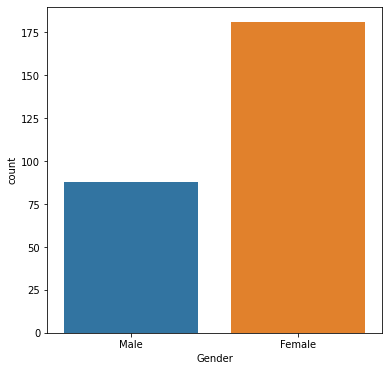

In [9]:
## Gender
plt.figure(figsize=(6,6))
sns.countplot(df.Gender)
plt.show()

- As we assume that there are female customers are more than male customers.

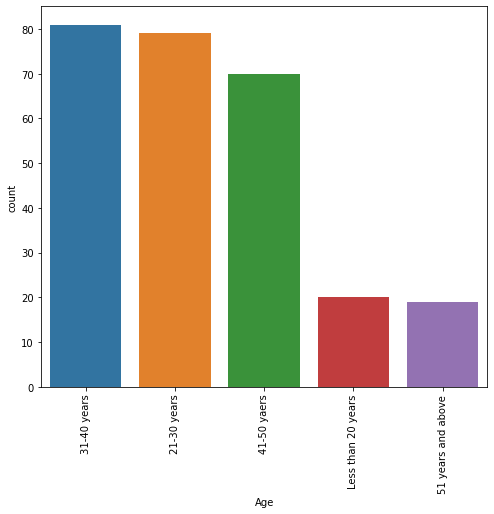

In [10]:
## Age
plt.figure(figsize=(8,7))
sns.countplot(df.Age)
plt.xticks(rotation=90)
plt.show()

- We can see from above graph that 21 to 40 year Aged people mostly do the online shopping.

## Age Vs Gender:

In [11]:
def factor_plot(feature):
    plt.figure(figsize=(10,7))
    sns.factorplot(x='Gender',col=feature,kind='count',data=df,size=4)
    crosstab=pd.crosstab(columns=df['Gender'],index=df[feature],normalize='index')
    return crosstab

Gender                Female      Male
Age                                   
21-30 years         0.746835  0.253165
31-40 years         0.629630  0.370370
41-50 yaers         0.614286  0.385714
51 years and above  0.789474  0.210526
Less than 20 years  0.650000  0.350000

<Figure size 720x504 with 0 Axes>

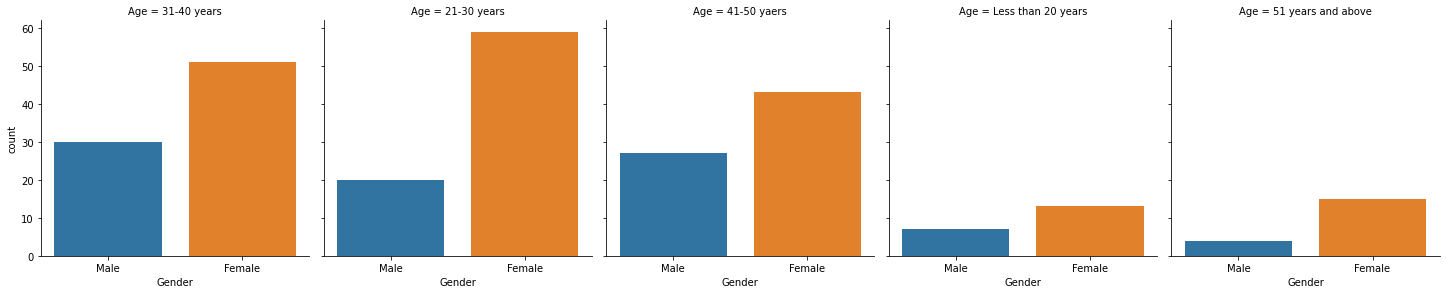

In [12]:
factor_plot('Age')

- We observe from above graph that almost every age group the count of female customers is more than Male customers.
- we can say that females are most like to do online shopping.

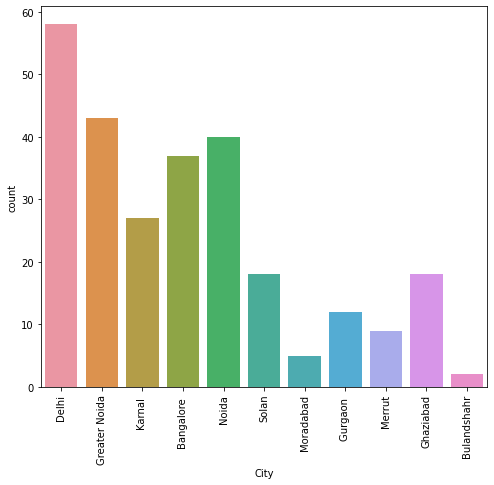

In [13]:
## City
plt.figure(figsize=(8,7))
sns.countplot(df.City)
plt.xticks(rotation=90)
plt.show()


- Most of people are like to do online shopping from delhi.
- In other hand Less people are like to do online shoopinng from Bulanddshahr.

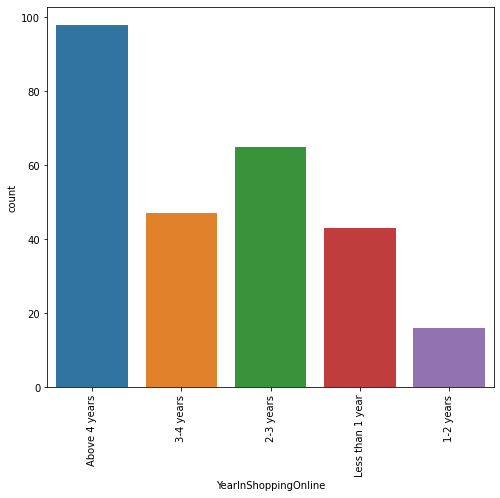

In [14]:
## YearInShoppingOnline
plt.figure(figsize=(8,7))
sns.countplot(df.YearInShoppingOnline)
plt.xticks(rotation=90)
plt.show()

- As we can see that most of the customers are doing online shopping after more than 4 years.

Gender                  Female      Male
YearInShoppingOnline                    
1-2 years             0.812500  0.187500
2-3 years             0.661538  0.338462
3-4 years             0.446809  0.553191
Above 4 years         0.734694  0.265306
Less than 1 year      0.744186  0.255814

<Figure size 720x504 with 0 Axes>

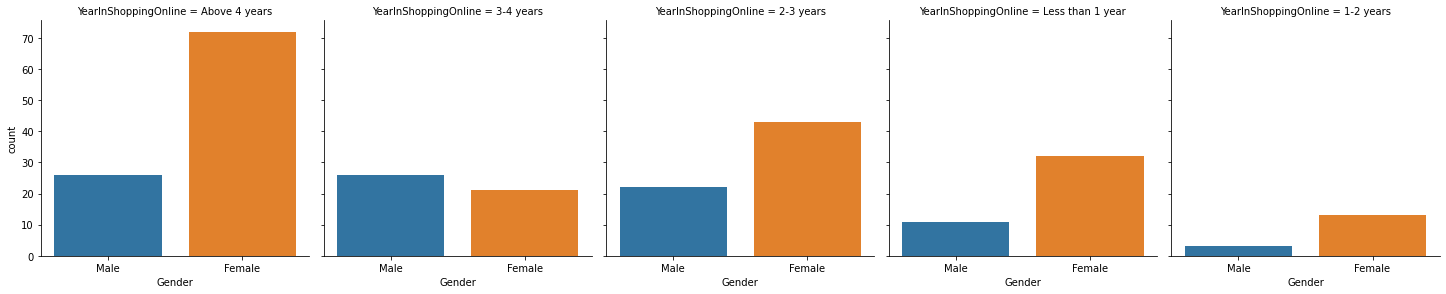

In [15]:
factor_plot('YearInShoppingOnline')

- We can see there is amazing fact that male customers count is higher than female customers who  are doing online shopping after 3 to 4 year.
- Female customers are doing shopping after 1- 4 year gap most of the time.

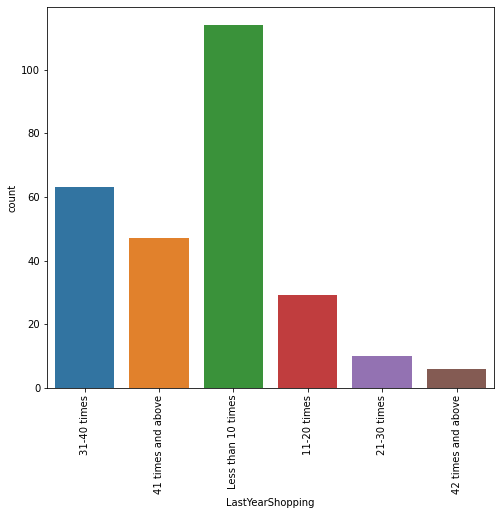

In [16]:
## LastYearShopping
plt.figure(figsize=(8,7))
sns.countplot(df.LastYearShopping)
plt.xticks(rotation=90)
plt.show()

- The count of the customers is very high who did online shopping less than 10 times in past 1 year.
- Very less people did online shoppiing  more than  42 times in past 1 year.
- We can see that there is higher count of people who did shopping 31-40 times and 41 or more than 41 times in last 1 year, as compare to those customers who  did shopping only 11-20 or 21-30 times in last 1 year.

Gender                Female      Male
LastYearShopping                      
11-20 times         0.827586  0.172414
21-30 times         0.000000  1.000000
31-40 times         0.746032  0.253968
41 times and above  0.765957  0.234043
42 times and above  0.500000  0.500000
Less than 10 times  0.622807  0.377193

<Figure size 720x504 with 0 Axes>

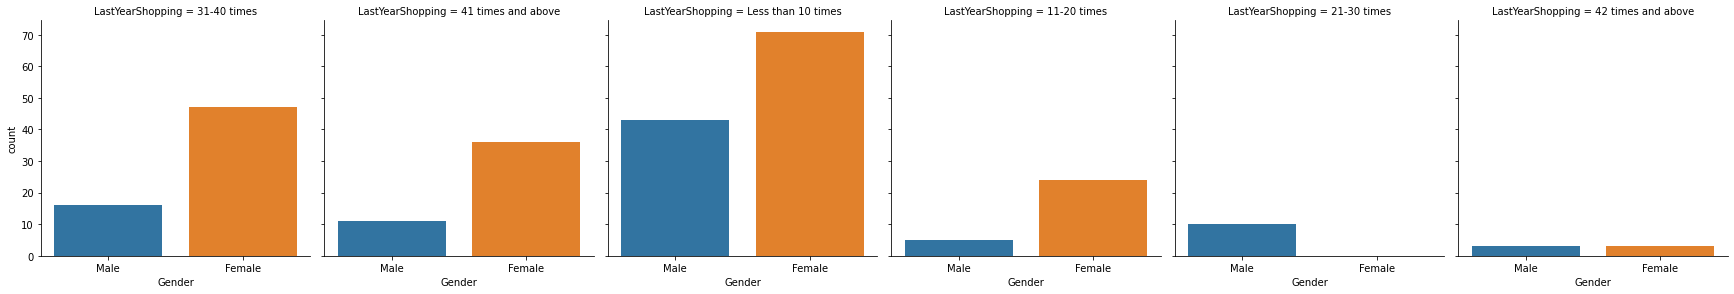

In [17]:
factor_plot('LastYearShopping')

### Insights of above graphs:
- Only male customers are doing online shopping as 21 to 30 times in past 1 year.
- Female and Male both are done shopping in same ratio as more than 42 times in past 1 year.Here we can not say that male are more expensive or female are more expensive for online shopping.
- The count of female customers are very high for doing shopping as 11-20 times in last 1 year.


In [18]:
df.head()

Gender          Age           City  Pincode YearInShoppingOnline  \
0    Male  31-40 years          Delhi   110009        Above 4 years   
1  Female  21-30 years          Delhi   110030        Above 4 years   
2  Female  21-30 years  Greater Noida   201308            3-4 years   
3    Male  21-30 years        Karnal    132001            3-4 years   
4  Female  21-30 years     Bangalore    530068            2-3 years   

     LastYearShopping InternetAccessUsing DeviceAccessUsing MobileScreenSize  \
0         31-40 times             Dial-up           Desktop           Others   
1  41 times and above               Wi-Fi        Smartphone       4.7 inches   
2  41 times and above     Mobile Internet        Smartphone       5.5 inches   
3  Less than 10 times     Mobile Internet        Smartphone       5.5 inches   
4         11-20 times               Wi-Fi        Smartphone       4.7 inches   

                DeviceOS   BrowserUsing      ChannelFollow  \
0  Window/windows Mobile  Google chrome      Search Engine   
1                IOS/Mac  Google chrome      Search Engine   
2                Android  Google chrome      Search Engine   
3                IOS/Mac         Safari      Search Engine   
4                IOS/Mac         Safari  Content Marketing   

  PlatformUsingAfterFirstVisit   PurchaseDuration  \
0                Search Engine          6-10 mins   
1              Via application  more than 15 mins   
2              Via application         11-15 mins   
3                Search Engine          6-10 mins   
4              Via application  more than 15 mins   

                          PaymentTerm AbandonFrequency  \
0  E-wallets (Paytm, Freecharge etc.)        Sometimes   
1                  Credit/Debit cards  Very frequently   
2  E-wallets (Paytm, Freecharge etc.)        Sometimes   
3                  Credit/Debit cards            Never   
4                  Credit/Debit cards       Frequently   

         ReasonBehindAbandon       ContentRating ProductComparisonRating  \
0              Lack of trust           Agree (4)         Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)      Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)               Agree (4)   
3   Better alternative offer           Agree (4)               Agree (4)   
4   Better alternative offer  Strongly agree (5)         Indifferent (3)   

    InformationRating RelevantInformationRating    NavigationRating  \
0     Indifferent (3)                 Agree (4)           Agree (4)   
1  Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2           Agree (4)                 Agree (4)           Agree (4)   
3     Indifferent (3)                 Agree (4)  Strongly agree (5)   
4     Indifferent (3)                 Agree (4)           Agree (4)   

      LoadingSpeedRating     InterfaceRating PaymentMethodRating  \
0  Strongly disagree (1)       Dis-agree (2)       Dis-agree (2)   
1     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2              Agree (4)  Strongly agree (5)  Strongly agree (5)   
3              Agree (4)  Strongly agree (5)  Strongly agree (5)   
4     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   

          TrustRating       EmpathyRating       PrivacyRating  \
0        Disagree (2)  Strongly agree (5)           Agree (4)   
1  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
3           Agree (4)  Strongly agree (5)  Strongly agree (5)   
4           Agree (4)  Strongly agree (5)           Agree (4)   

  ResponsivenessRating   Benefit&Discounts        EnjoymentRating  \
0            Agree (4)     indifferent (3)  Strongly disagree (1)   
1   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
2   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
3            Agree (4)           Agree (4)        indifferent (3)   
4   Strongly agree (5)  S

In [19]:
def plot_count(feature):
    print(df[feature].value_counts(normalize=True))
    plt.figure(figsize=(8,7))
    sns.countplot(df[feature])
    plt.title(feature,fontsize=15)
    plt.xticks(rotation=90)
    plt.show()

Mobile internet    0.527881
Wi-Fi              0.282528
Mobile Internet    0.174721
Dial-up            0.014870
Name: InternetAccessUsing, dtype: float64


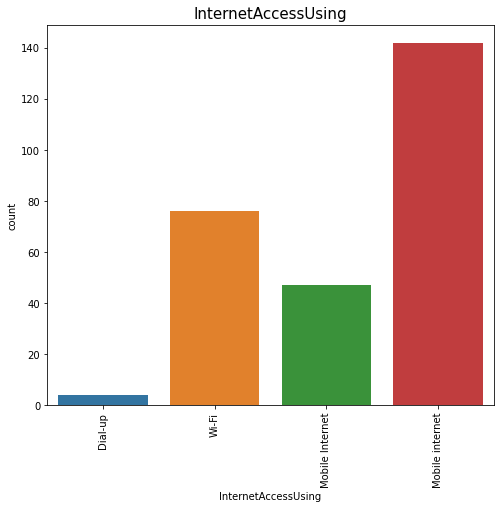

In [20]:
plot_count('InternetAccessUsing')

- Most of the customers use mobile Internet while online shopping.

Smartphone    0.524164
Laptop        0.319703
Desktop       0.111524
Tablet        0.044610
Name: DeviceAccessUsing, dtype: float64


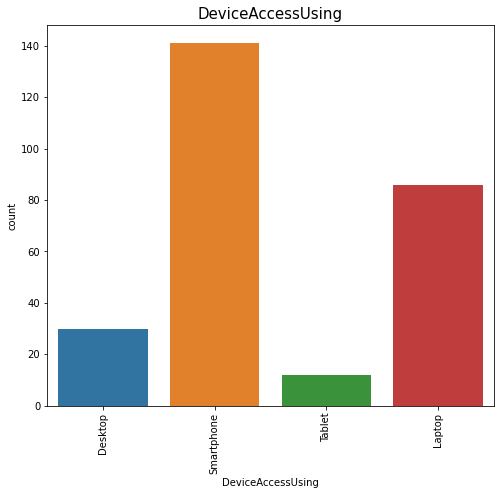

In [21]:
plot_count('DeviceAccessUsing')

- Most of the  custmores are use Smartphone for online shopping and simliarly in other hand very less people are use Tablet for online shopping.

Google chrome      0.802974
Safari             0.148699
Opera              0.029740
Mozilla Firefox    0.018587
Name: BrowserUsing, dtype: float64


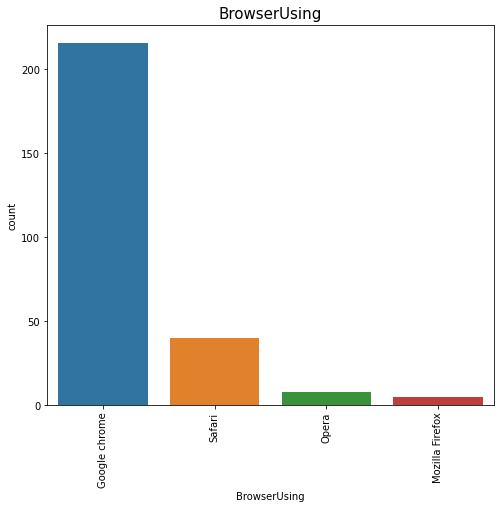

In [22]:
plot_count('BrowserUsing')

- Most of the customer use Google chrome.

more than 15 mins    0.457249
6-10 mins            0.263941
11-15 mins           0.171004
Less than 1 min      0.055762
1-5 mins             0.052045
Name: PurchaseDuration, dtype: float64


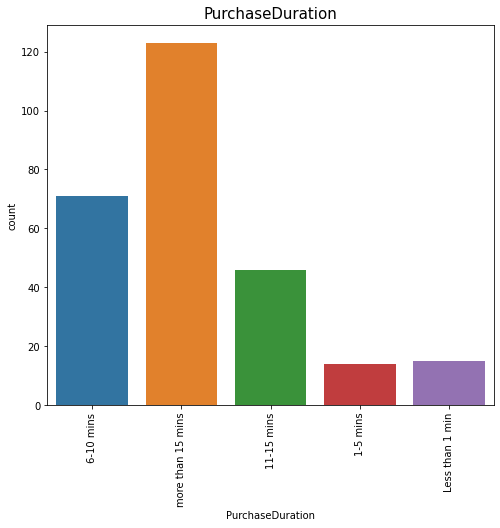

In [23]:
plot_count('PurchaseDuration')

Gender               Female      Male
PurchaseDuration                     
1-5 mins           0.714286  0.285714
11-15 mins         0.891304  0.108696
6-10 mins          0.380282  0.619718
Less than 1 min    0.800000  0.200000
more than 15 mins  0.739837  0.260163

<Figure size 720x504 with 0 Axes>

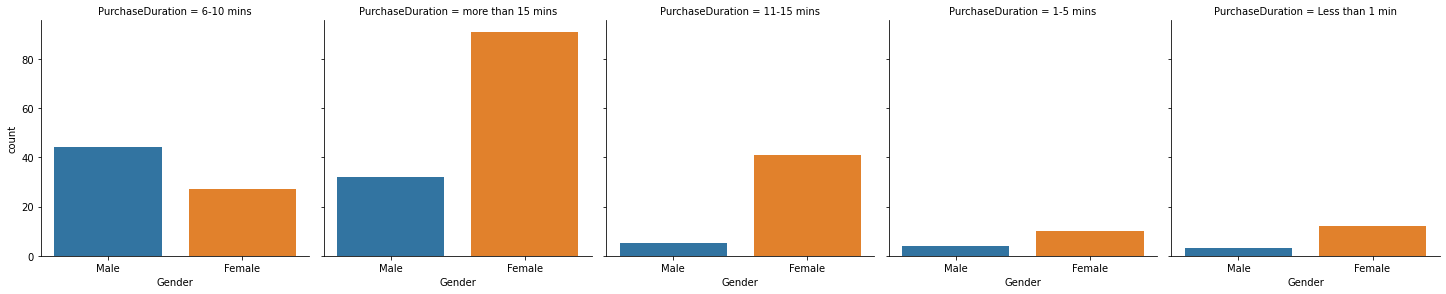

In [24]:
factor_plot('PurchaseDuration')

- In first count graph we can see that most of the customers take time more than 15 minutes for purchase one item.
- In second factor plot we can see that Most of the male customers take time 6 to 10 minutes for purchase one itme.
- Also we can see that Female customers are take time less than 1 minute as compare to male customers.

Credit/Debit cards                    0.550186
Cash on delivery (CoD)                0.282528
E-wallets (Paytm, Freecharge etc.)    0.167286
Name: PaymentTerm, dtype: float64


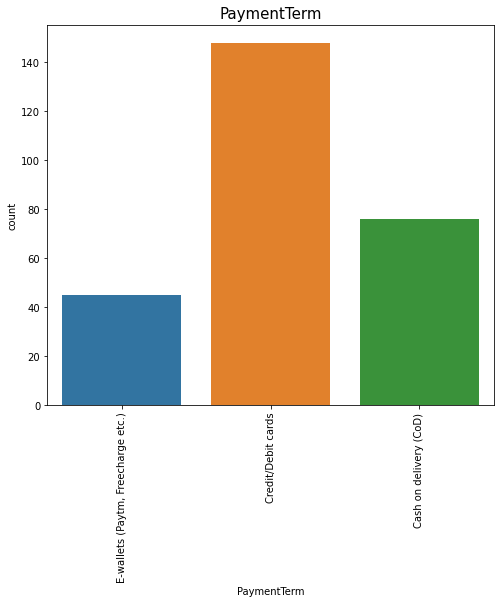

In [25]:
plot_count('PaymentTerm')

- Most of the customers use Credit or debit cards for make payment.

Gender                                Female      Male
PaymentTerm                                           
Cash on delivery (CoD)              0.763158  0.236842
Credit/Debit cards                  0.621622  0.378378
E-wallets (Paytm, Freecharge etc.)  0.688889  0.311111

<Figure size 720x504 with 0 Axes>

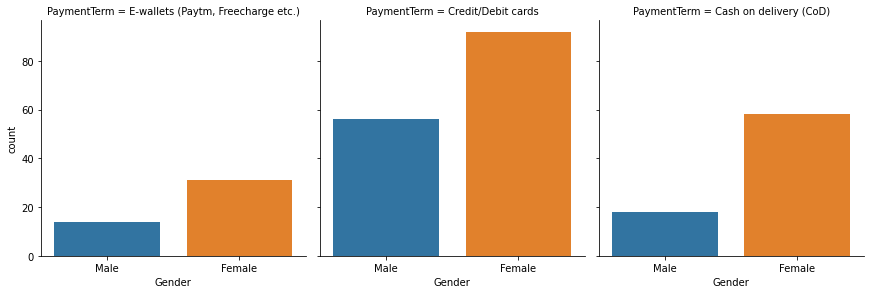

In [26]:
factor_plot('PaymentTerm')

- Mostly Female customers are choose  payment method as cash on delivery as compare to male customers.

Sometimes          0.635688
Never              0.178439
Frequently         0.130112
Very frequently    0.055762
Name: AbandonFrequency, dtype: float64


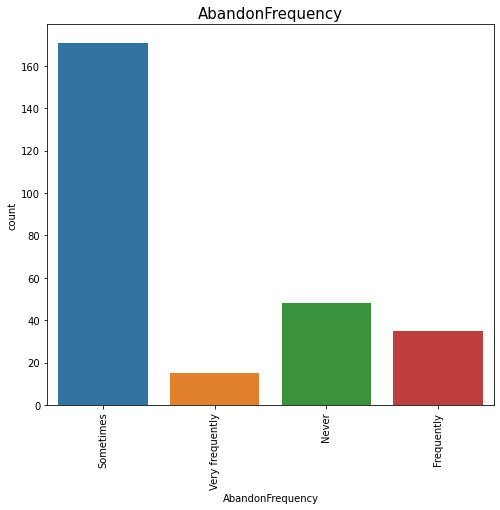

In [27]:
plot_count('AbandonFrequency')

Better alternative offer        0.494424
Promo code not applicable       0.200743
Change in price                 0.137546
Lack of trust                   0.115242
No preferred mode of payment    0.052045
Name: ReasonBehindAbandon, dtype: float64


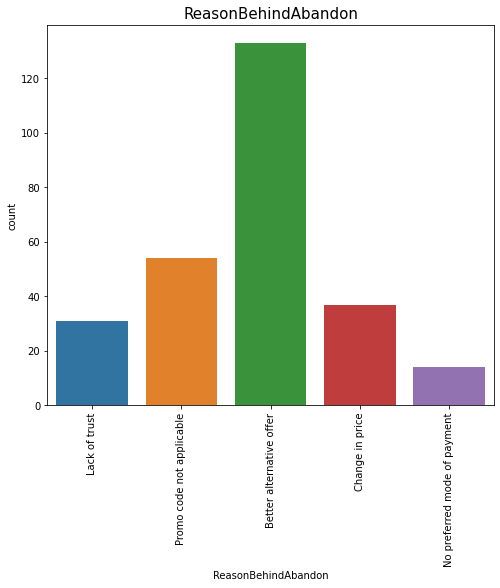

In [28]:
plot_count('ReasonBehindAbandon')

Strongly agree (5)       0.609665
Agree (4)                0.297398
Strongly disagree (1)    0.066914
Indifferent (3)          0.026022
Name: ContentRating, dtype: float64


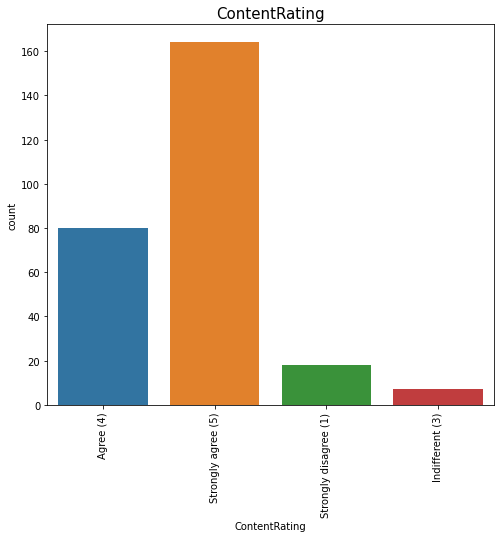

In [29]:
plot_count('ContentRating')

Gender                   Female      Male
ContentRating                            
Agree (4)              0.462500  0.537500
Indifferent (3)        0.571429  0.428571
Strongly agree (5)     0.786585  0.213415
Strongly disagree (1)  0.611111  0.388889

<Figure size 720x504 with 0 Axes>

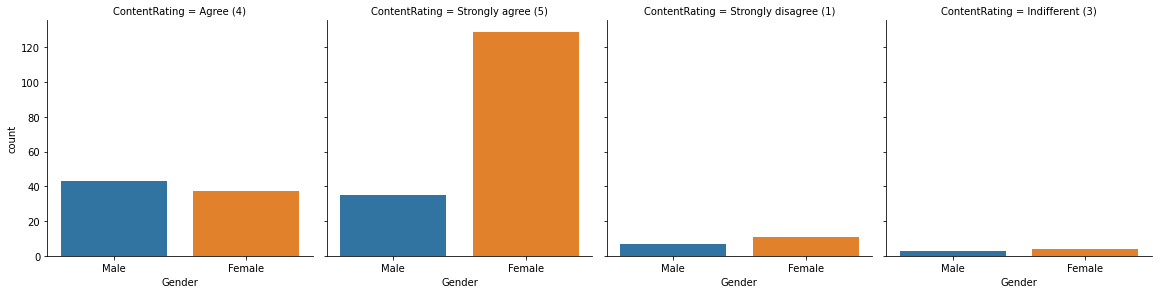

In [30]:
factor_plot('ContentRating')

- Most of the customers are satisfied with content of the product.
- From which Female customers are more then satisfied with content of the product.

Strongly agree (5)    0.431227
Agree (4)             0.342007
Indifferent (3)       0.159851
Dis-agree (2)         0.066914
Name: ProductComparisonRating, dtype: float64


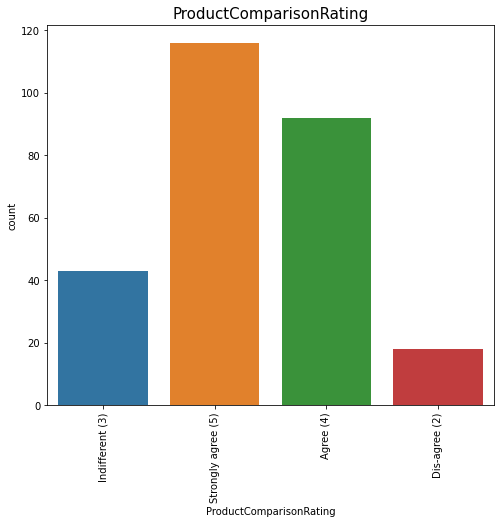

In [31]:
plot_count('ProductComparisonRating')

- 42% customers are strongly agreed and 34% customers are agreed with product comparision Rating. Total 76% customers are satisfied.

Agree (4)                0.375465
Strongly agree (5)       0.323420
Indifferent (3)          0.193309
Dis-agree (2)            0.066914
Strongly disagree (1)    0.040892
Name: InformationRating, dtype: float64


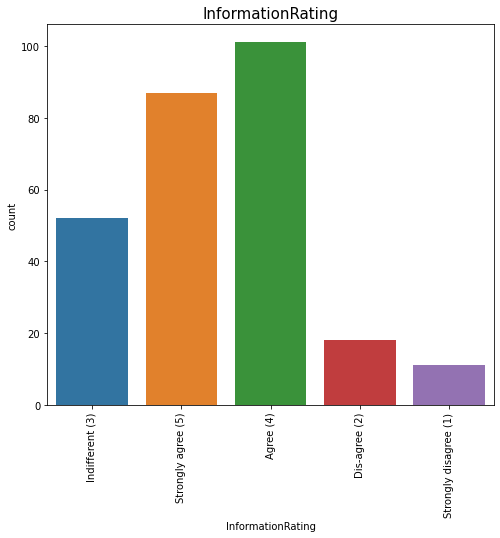

In [32]:
plot_count('InformationRating')

- 70% customers are agreed with information rating, only 1% customers are disagreed with information rating and 19% customers neither agree nor disagree with product Information rating.

Agree (4)                0.490706
Strongly agree (5)       0.397770
Strongly disagree (1)    0.066914
Dis-agree (2)            0.044610
Name: RelevantInformationRating, dtype: float64


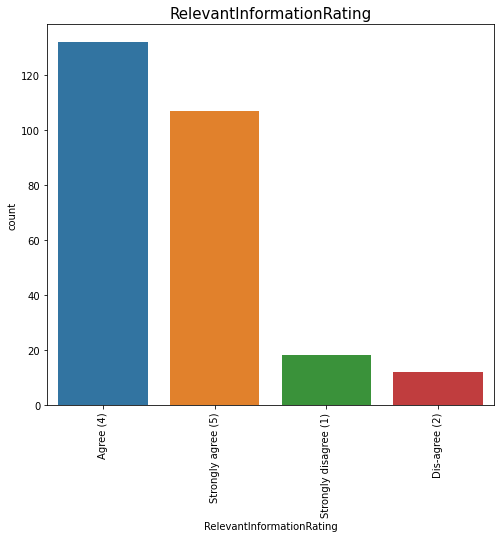

In [33]:
plot_count('RelevantInformationRating')

Strongly agree (5)       0.524164
Agree (4)                0.390335
Strongly disagree (1)    0.066914
Dis-agree (2)            0.018587
Name: NavigationRating, dtype: float64


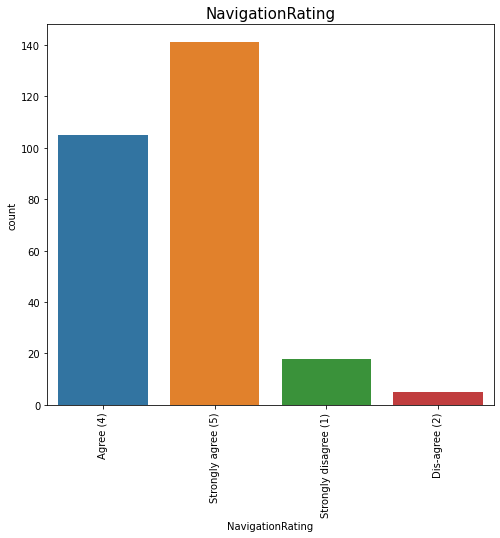

In [34]:
plot_count('NavigationRating')

- More than 90% customers are agree with navigation Rating.

Strongly agree (5)       0.427509
Agree (4)                0.416357
Dis-agree (2)            0.066914
Indifferent (3)          0.044610
Strongly disagree (1)    0.044610
Name: LoadingSpeedRating, dtype: float64


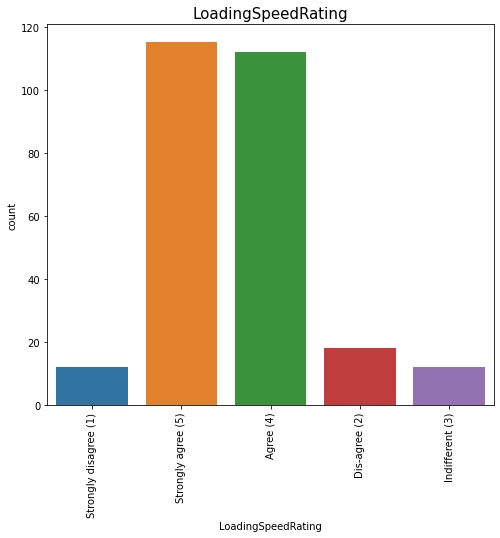

In [35]:
plot_count('LoadingSpeedRating')

- Almost 85% customers are satisfied with loading speed of the product.

In [36]:
df.head()

Gender          Age           City  Pincode YearInShoppingOnline  \
0    Male  31-40 years          Delhi   110009        Above 4 years   
1  Female  21-30 years          Delhi   110030        Above 4 years   
2  Female  21-30 years  Greater Noida   201308            3-4 years   
3    Male  21-30 years        Karnal    132001            3-4 years   
4  Female  21-30 years     Bangalore    530068            2-3 years   

     LastYearShopping InternetAccessUsing DeviceAccessUsing MobileScreenSize  \
0         31-40 times             Dial-up           Desktop           Others   
1  41 times and above               Wi-Fi        Smartphone       4.7 inches   
2  41 times and above     Mobile Internet        Smartphone       5.5 inches   
3  Less than 10 times     Mobile Internet        Smartphone       5.5 inches   
4         11-20 times               Wi-Fi        Smartphone       4.7 inches   

                DeviceOS   BrowserUsing      ChannelFollow  \
0  Window/windows Mobile  Google chrome      Search Engine   
1                IOS/Mac  Google chrome      Search Engine   
2                Android  Google chrome      Search Engine   
3                IOS/Mac         Safari      Search Engine   
4                IOS/Mac         Safari  Content Marketing   

  PlatformUsingAfterFirstVisit   PurchaseDuration  \
0                Search Engine          6-10 mins   
1              Via application  more than 15 mins   
2              Via application         11-15 mins   
3                Search Engine          6-10 mins   
4              Via application  more than 15 mins   

                          PaymentTerm AbandonFrequency  \
0  E-wallets (Paytm, Freecharge etc.)        Sometimes   
1                  Credit/Debit cards  Very frequently   
2  E-wallets (Paytm, Freecharge etc.)        Sometimes   
3                  Credit/Debit cards            Never   
4                  Credit/Debit cards       Frequently   

         ReasonBehindAbandon       ContentRating ProductComparisonRating  \
0              Lack of trust           Agree (4)         Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)      Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)               Agree (4)   
3   Better alternative offer           Agree (4)               Agree (4)   
4   Better alternative offer  Strongly agree (5)         Indifferent (3)   

    InformationRating RelevantInformationRating    NavigationRating  \
0     Indifferent (3)                 Agree (4)           Agree (4)   
1  Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2           Agree (4)                 Agree (4)           Agree (4)   
3     Indifferent (3)                 Agree (4)  Strongly agree (5)   
4     Indifferent (3)                 Agree (4)           Agree (4)   

      LoadingSpeedRating     InterfaceRating PaymentMethodRating  \
0  Strongly disagree (1)       Dis-agree (2)       Dis-agree (2)   
1     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2              Agree (4)  Strongly agree (5)  Strongly agree (5)   
3              Agree (4)  Strongly agree (5)  Strongly agree (5)   
4     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   

          TrustRating       EmpathyRating       PrivacyRating  \
0        Disagree (2)  Strongly agree (5)           Agree (4)   
1  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
3           Agree (4)  Strongly agree (5)  Strongly agree (5)   
4           Agree (4)  Strongly agree (5)           Agree (4)   

  ResponsivenessRating   Benefit&Discounts        EnjoymentRating  \
0            Agree (4)     indifferent (3)  Strongly disagree (1)   
1   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
2   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
3            Agree (4)           Agree (4)        indifferent (3)   
4   Strongly agree (5)  S

Strongly agree (5)       0.702602
Agree (4)                0.167286
Strongly disagree (1)    0.066914
Dis-agree (2)            0.044610
Indifferent (3)          0.018587
Name: InterfaceRating, dtype: float64


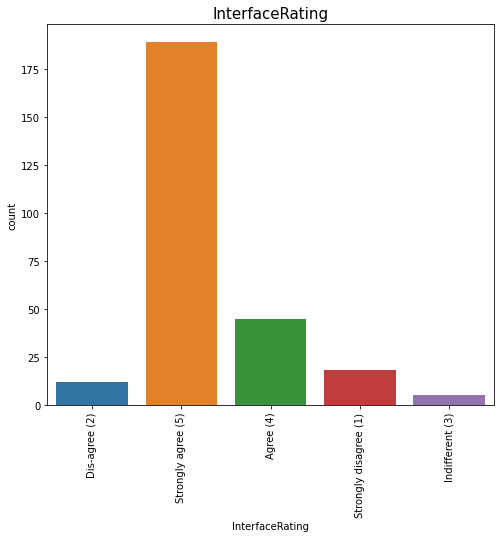

In [37]:
plot_count('InterfaceRating')

In [38]:
def Recommend_Retailer(feature):
    print(df[feature].value_counts(normalize=True))
    plt.figure(figsize=(8,7))
    sns.countplot(df[feature],hue=df['RecommendOnlineRetailer'])
    plt.title( 'Relation With RecommendOnlineRetailer',fontsize=15)
    plt.xticks(rotation=90)
    plt.show()

Strongly agree (5)       0.702602
Agree (4)                0.167286
Strongly disagree (1)    0.066914
Dis-agree (2)            0.044610
Indifferent (3)          0.018587
Name: InterfaceRating, dtype: float64


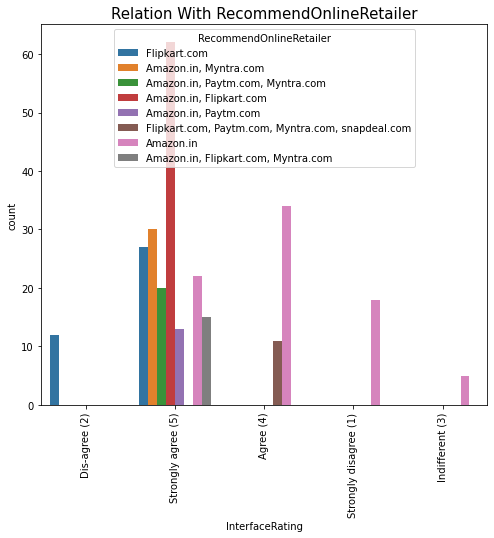

In [39]:
Recommend_Retailer('InterfaceRating')

- Customers are only Strongly disagree with Amazon.in Interface Rating.

Strongly agree (5)    0.591078
Agree (4)             0.297398
Dis-agree (2)         0.111524
Name: PaymentMethodRating, dtype: float64


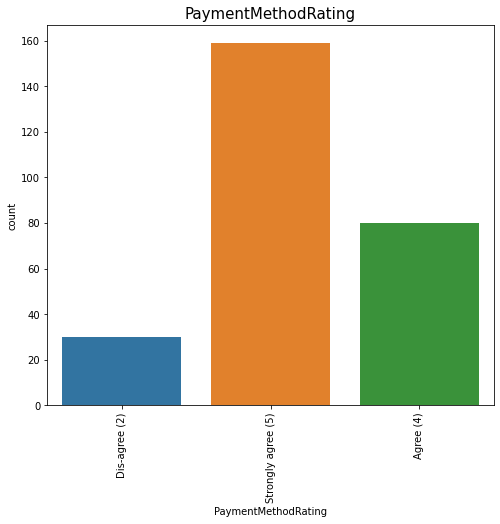

In [40]:
plot_count('PaymentMethodRating')

- Most of the Customers are strongly satisfied with  payment method.

Strongly agree (5)    0.591078
Agree (4)             0.297398
Dis-agree (2)         0.111524
Name: PaymentMethodRating, dtype: float64


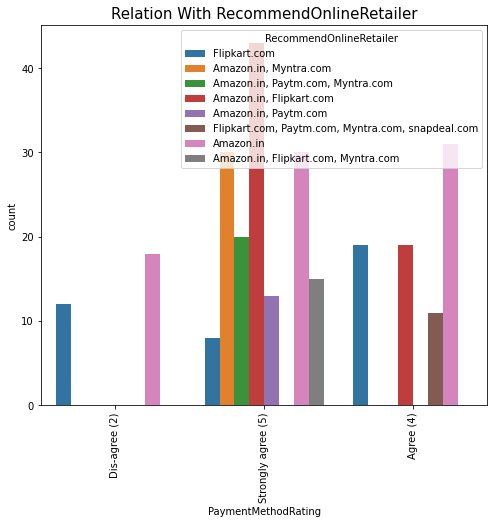

In [41]:
Recommend_Retailer('PaymentMethodRating')

- When we talk about Amazon payTm myntra.com payment rating the customers are strongly satisfied.

Strongly agree (5)    0.524164
Agree (4)             0.319703
Disagree (2)          0.111524
indifferent  (3)      0.044610
Name: TrustRating, dtype: float64


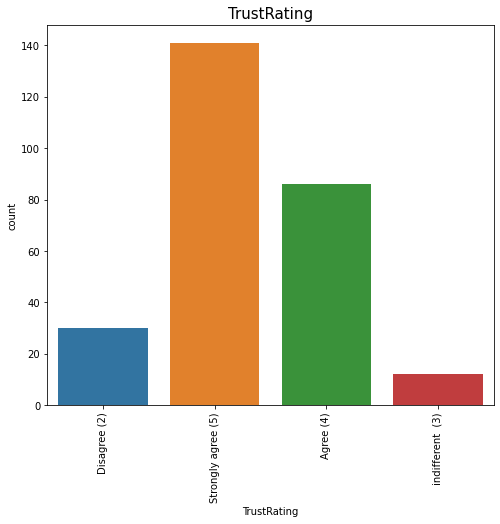

In [42]:
plot_count('TrustRating')

- most of the customers are strongly agree with when we talk for Trust Rating.

In [43]:
crosstab=pd.crosstab(columns=df['RecommendOnlineRetailer'],index=df['TrustRating'],normalize='index')
crosstab

RecommendOnlineRetailer  Amazon.in  Amazon.in, Flipkart.com  \
TrustRating                                                   
Agree (4)                 0.186047                 0.511628   
Disagree (2)              0.600000                 0.000000   
Strongly agree (5)        0.283688                 0.078014   
indifferent  (3)          0.416667                 0.583333   

RecommendOnlineRetailer  Amazon.in, Flipkart.com, Myntra.com  \
TrustRating                                                    
Agree (4)                                           0.000000   
Disagree (2)                                        0.000000   
Strongly agree (5)                                  0.106383   
indifferent  (3)                                    0.000000   

RecommendOnlineRetailer  Amazon.in, Myntra.com  Amazon.in, Paytm.com  \
TrustRating                                                            
Agree (4)                             0.174419              0.000000   
Disagree (2)                          0.000000              0.000000   
Strongly agree (5)                    0.106383              0.092199   
indifferent  (3)                      0.000000              0.000000   

RecommendOnlineRetailer  Amazon.in, Paytm.com, Myntra.com  Flipkart.com  \
TrustRating                                                               
Agree (4)                                        0.000000      0.000000   
Disagree (2)                                     0.000000      0.400000   
Strongly agree (5)                               0.141844      0.191489   
indifferent  (3)                                 0.000000      0.000000   

RecommendOnlineRetailer  Flipkart.com, Paytm.com, Myntra.com, snapdeal.com  
TrustRating                                                                 
Agree (4)                                                         0.127907  
Disagree (2)                                                      0.000000  
Strongly agree (5)                                                0.000000  
indifferent  (3)                                                  0.000000

Strongly agree (5)    0.687732
Agree (4)             0.215613
indifferent (3)       0.096654
Name: PrivacyRating, dtype: float64


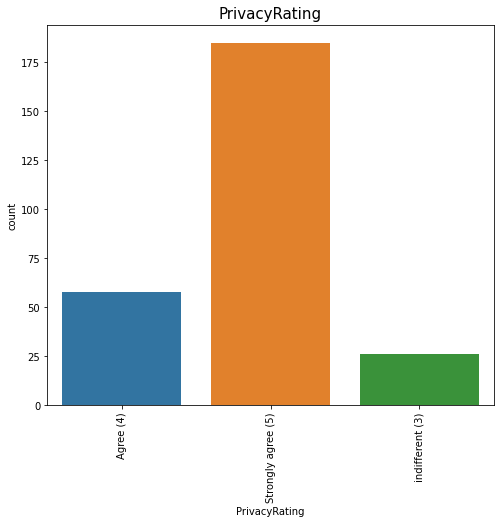

In [44]:
plot_count('PrivacyRating')

- most of customers are strongly agree with privacy of the online shopping portals

Strongly agree (5)    0.687732
Agree (4)             0.215613
indifferent (3)       0.096654
Name: PrivacyRating, dtype: float64


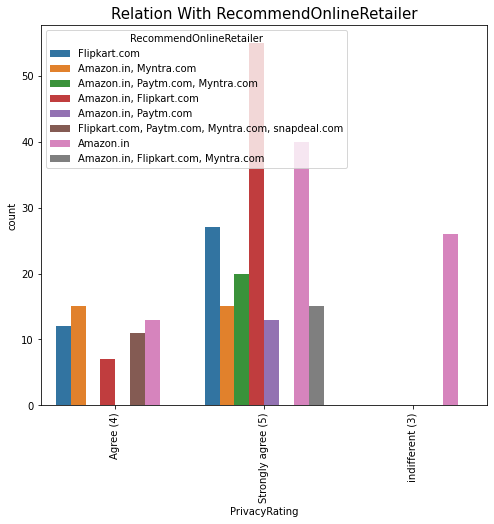

In [45]:
Recommend_Retailer('PrivacyRating')

- For only amazon.in website some customers did not sure about the privacy rating of that online shopping portal.

Strongly agree (5)       0.553903
Agree (4)                0.349442
indifferent (3)          0.055762
Strongly disagree (1)    0.040892
Name: ResponsivenessRating, dtype: float64


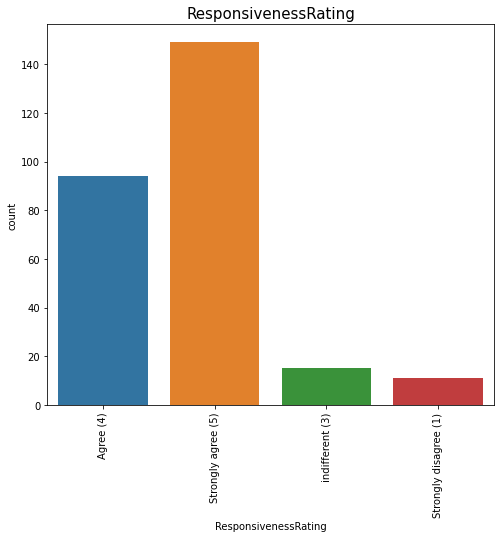

In [46]:
plot_count('ResponsivenessRating')

- 90% of the customers are agreed with responsiveness of the particular online shopping protal.

Strongly agree (5)       0.553903
Agree (4)                0.349442
indifferent (3)          0.055762
Strongly disagree (1)    0.040892
Name: ResponsivenessRating, dtype: float64


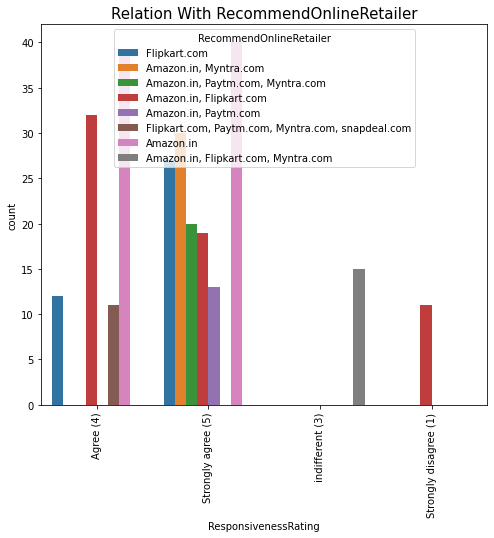

In [47]:
Recommend_Retailer('ResponsivenessRating')

- Customers are not quite sure to rate about responsiveness of the online shopping website when they do shopping with amazon.in,Flipkart.com,Mytra.com together.
- When Customers are doing shopping with amazon.in and Flipkart.com together, they are  strongly disagree with responsiveness of the website.

Strongly agree (5)       0.390335
Agree (4)                0.315985
indifferent (3)          0.185874
Strongly disagree (1)    0.066914
Dis-agree (2)            0.040892
Name: Benefit&Discounts, dtype: float64


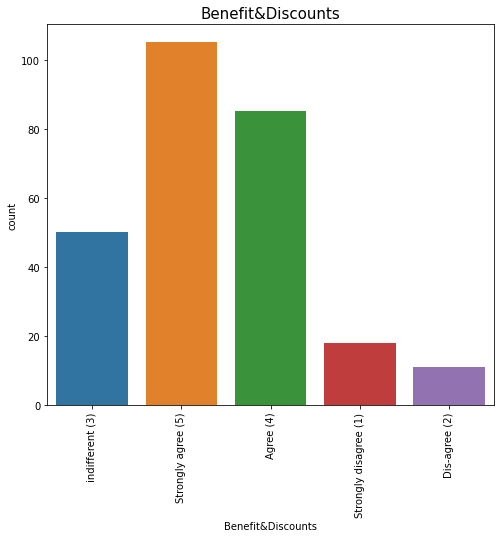

In [48]:
plot_count('Benefit&Discounts')

- 70% customers are satisfied with Benefit&Discounts of the product.
- Almost 19% cutomers neither agree nor disagree with benefit&Discounts of the product.
- only 1% cutomers are disagree with Benefit& Discounts of the product.

Strongly agree (5)       0.390335
Agree (4)                0.315985
indifferent (3)          0.185874
Strongly disagree (1)    0.066914
Dis-agree (2)            0.040892
Name: Benefit&Discounts, dtype: float64


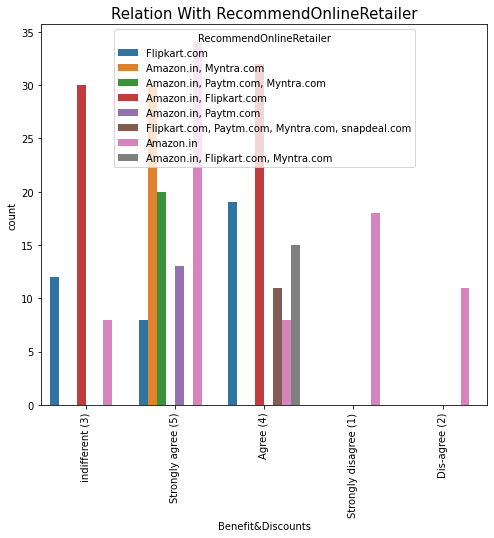

In [49]:
Recommend_Retailer('Benefit&Discounts')

- When customers are searching the product in Amazon.in, they are strongly agreed by benefit&discounts of the product.

Strongly agree (5)       0.319703
indifferent (3)          0.278810
Agree (4)                0.219331
Strongly disagree (1)    0.111524
Dis-agree (2)            0.070632
Name: EnjoymentRating, dtype: float64


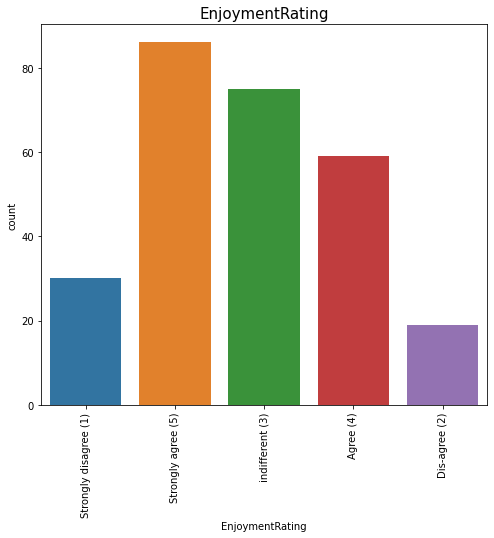

In [50]:
plot_count('EnjoymentRating')

- 54% cutomers are enjoyed while shopping.
- 28% customers are neither enojoy nor bored while shopping.
- 12% cutomers are disagreed while shopping.

Strongly agree (5)       0.319703
indifferent (3)          0.278810
Agree (4)                0.219331
Strongly disagree (1)    0.111524
Dis-agree (2)            0.070632
Name: EnjoymentRating, dtype: float64


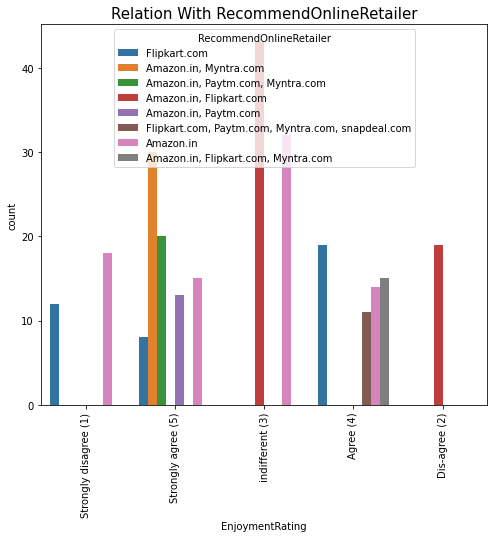

In [51]:
Recommend_Retailer('EnjoymentRating')

- Those customers who go for shopping in Flipkart.com they are strongly disagree with enjoyment.

Strongly agree (5)    0.736059
Agree (4)             0.189591
Dis-agree (2)         0.074349
Name: Return&Replacement, dtype: float64


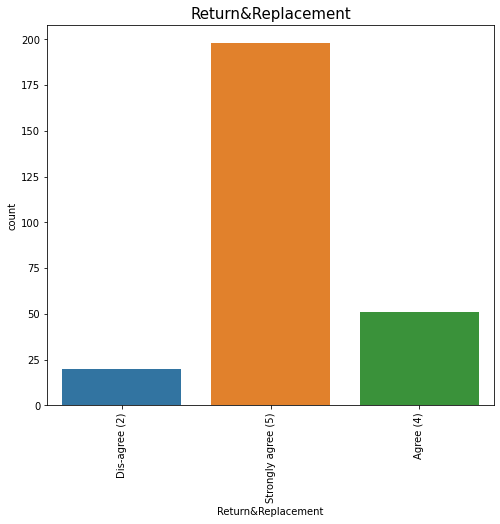

In [52]:
plot_count('Return&Replacement')

Strongly agree (5)    0.736059
Agree (4)             0.189591
Dis-agree (2)         0.074349
Name: Return&Replacement, dtype: float64


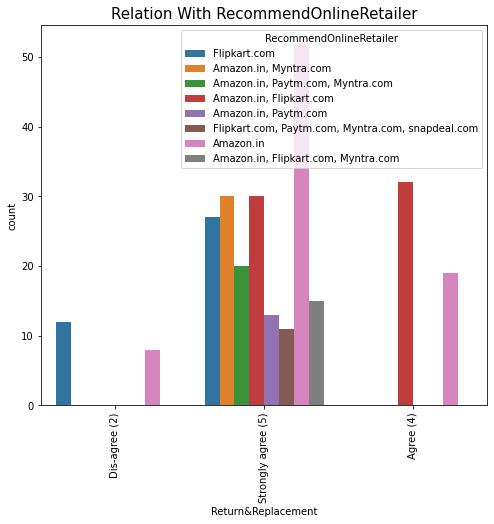

In [53]:
Recommend_Retailer('Return&Replacement')

- flipkart and amazon customers are dis-agreed by return&replacement policy of the these sites.

Strongly agree (5)       0.427509
indifferent (3)          0.237918
Agree (4)                0.237918
Dis-agree (2)            0.055762
Strongly disagree (1)    0.040892
Name: LolaltyRating, dtype: float64


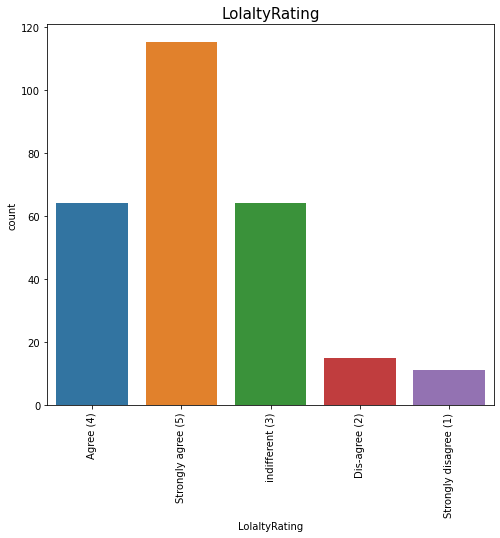

In [54]:
plot_count('LolaltyRating')

- Most of the customers are agreed with loyalty of the product.

Strongly agree (5)       0.427509
indifferent (3)          0.237918
Agree (4)                0.237918
Dis-agree (2)            0.055762
Strongly disagree (1)    0.040892
Name: LolaltyRating, dtype: float64


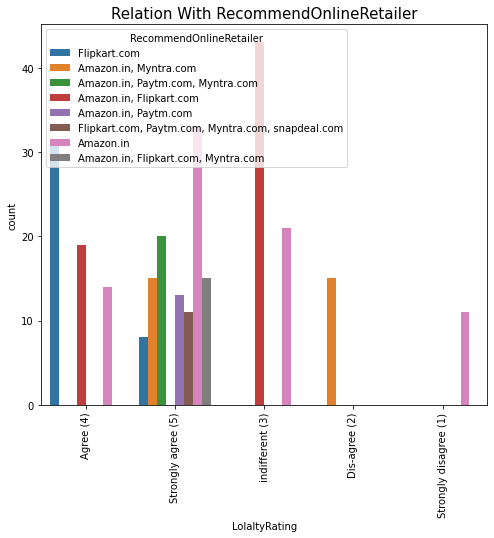

In [55]:
Recommend_Retailer('LolaltyRating')

- some customers are did not satisfied with loyalty of amazon.in online shopping portal.

In [56]:
df.head()

Gender          Age           City  Pincode YearInShoppingOnline  \
0    Male  31-40 years          Delhi   110009        Above 4 years   
1  Female  21-30 years          Delhi   110030        Above 4 years   
2  Female  21-30 years  Greater Noida   201308            3-4 years   
3    Male  21-30 years        Karnal    132001            3-4 years   
4  Female  21-30 years     Bangalore    530068            2-3 years   

     LastYearShopping InternetAccessUsing DeviceAccessUsing MobileScreenSize  \
0         31-40 times             Dial-up           Desktop           Others   
1  41 times and above               Wi-Fi        Smartphone       4.7 inches   
2  41 times and above     Mobile Internet        Smartphone       5.5 inches   
3  Less than 10 times     Mobile Internet        Smartphone       5.5 inches   
4         11-20 times               Wi-Fi        Smartphone       4.7 inches   

                DeviceOS   BrowserUsing      ChannelFollow  \
0  Window/windows Mobile  Google chrome      Search Engine   
1                IOS/Mac  Google chrome      Search Engine   
2                Android  Google chrome      Search Engine   
3                IOS/Mac         Safari      Search Engine   
4                IOS/Mac         Safari  Content Marketing   

  PlatformUsingAfterFirstVisit   PurchaseDuration  \
0                Search Engine          6-10 mins   
1              Via application  more than 15 mins   
2              Via application         11-15 mins   
3                Search Engine          6-10 mins   
4              Via application  more than 15 mins   

                          PaymentTerm AbandonFrequency  \
0  E-wallets (Paytm, Freecharge etc.)        Sometimes   
1                  Credit/Debit cards  Very frequently   
2  E-wallets (Paytm, Freecharge etc.)        Sometimes   
3                  Credit/Debit cards            Never   
4                  Credit/Debit cards       Frequently   

         ReasonBehindAbandon       ContentRating ProductComparisonRating  \
0              Lack of trust           Agree (4)         Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)      Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)               Agree (4)   
3   Better alternative offer           Agree (4)               Agree (4)   
4   Better alternative offer  Strongly agree (5)         Indifferent (3)   

    InformationRating RelevantInformationRating    NavigationRating  \
0     Indifferent (3)                 Agree (4)           Agree (4)   
1  Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2           Agree (4)                 Agree (4)           Agree (4)   
3     Indifferent (3)                 Agree (4)  Strongly agree (5)   
4     Indifferent (3)                 Agree (4)           Agree (4)   

      LoadingSpeedRating     InterfaceRating PaymentMethodRating  \
0  Strongly disagree (1)       Dis-agree (2)       Dis-agree (2)   
1     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2              Agree (4)  Strongly agree (5)  Strongly agree (5)   
3              Agree (4)  Strongly agree (5)  Strongly agree (5)   
4     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   

          TrustRating       EmpathyRating       PrivacyRating  \
0        Disagree (2)  Strongly agree (5)           Agree (4)   
1  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
3           Agree (4)  Strongly agree (5)  Strongly agree (5)   
4           Agree (4)  Strongly agree (5)           Agree (4)   

  ResponsivenessRating   Benefit&Discounts        EnjoymentRating  \
0            Agree (4)     indifferent (3)  Strongly disagree (1)   
1   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
2   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
3            Agree (4)           Agree (4)        indifferent (3)   
4   Strongly agree (5)  S

Strongly agree (5)    0.494424
Agree (4)             0.297398
indifferent (3)       0.208178
Name: QualityInformation, dtype: float64


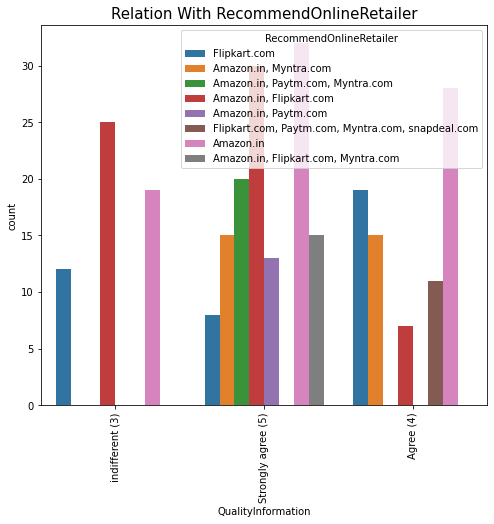

In [57]:
Recommend_Retailer('QualityInformation')

Strongly agree (5)    0.650558
Agree (4)             0.319703
Dis-agree (2)         0.029740
Name: SatisfactionRating, dtype: float64


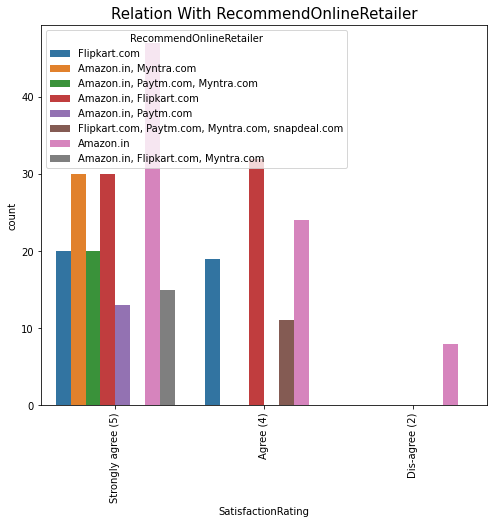

In [58]:
Recommend_Retailer('SatisfactionRating')

- Some customers are not satisfied with amazon.in

Strongly agree (5)    0.609665
Agree (4)             0.200743
indifferent (3)       0.148699
Dis-agree (2)         0.040892
Name: NetBenefitRating, dtype: float64


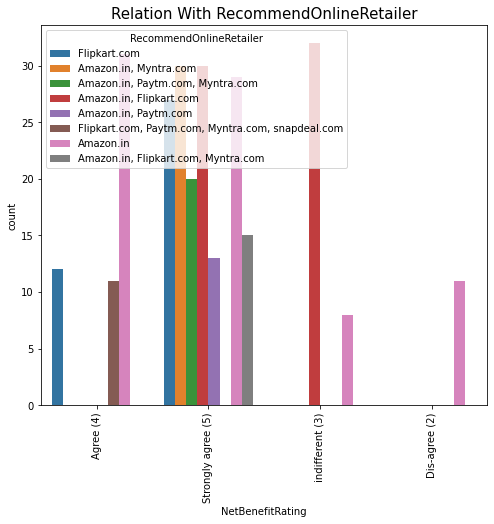

In [59]:
Recommend_Retailer('NetBenefitRating')

- customers are disagreed with Net Benefit of the product when he shopping from amazon.in 

Strongly agree (5)       0.453532
Agree (4)                0.434944
Strongly disagree (1)    0.066914
Dis-agree (2)            0.026022
indifferent (3)          0.018587
Name: TrustSatisfaction, dtype: float64


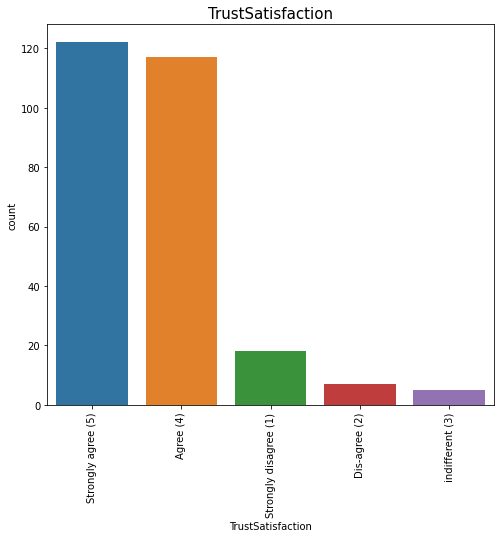

In [60]:
plot_count('TrustSatisfaction')

- Almost 90% customers are agreed with trust satisfaction.

Strongly agree (5)    0.412639
Agree (4)             0.349442
indifferent (3)       0.211896
Dis-agree (2)         0.026022
Name: VarietyOfList, dtype: float64


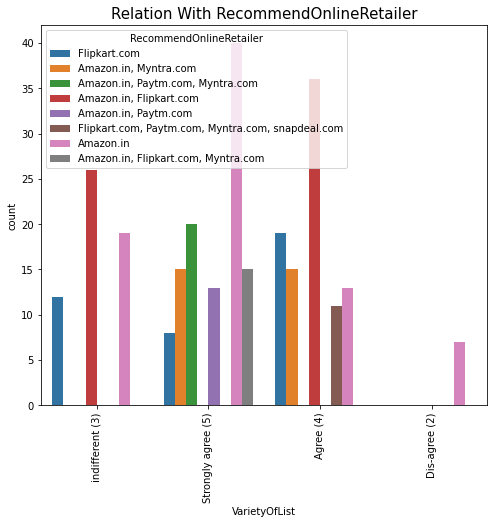

In [61]:
Recommend_Retailer('VarietyOfList')

- Some customers are not satisfied with variety of the  product when he shopping with amazon.in

Strongly agree (5)    0.501859
Agree (4)             0.364312
indifferent (3)       0.115242
Disagree (2)          0.018587
Name: Provision, dtype: float64


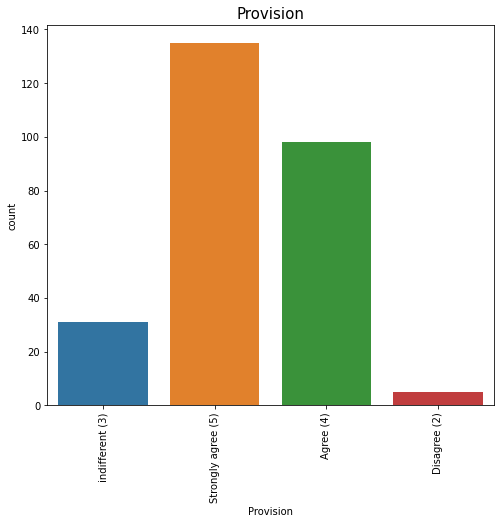

In [62]:
plot_count('Provision')

- only 0.02% customers are not satisfied with provision.

Strongly agree (5)    0.550186
Agree (4)             0.278810
Disagree (2)          0.115242
indifferent (3)       0.055762
Name: MonetarySavings, dtype: float64


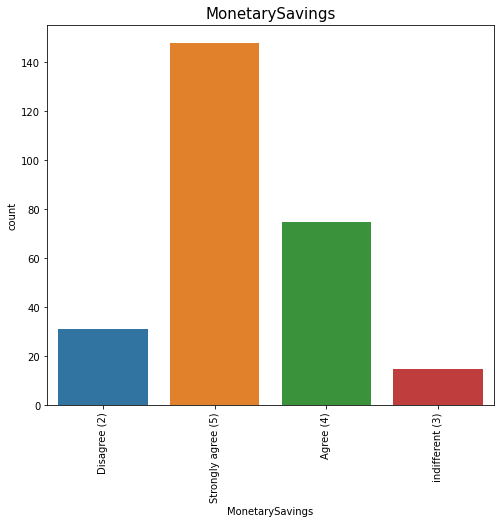

In [63]:
plot_count('MonetarySavings')

Agree (4)             0.513011
indifferent (3)       0.286245
Strongly agree (5)    0.200743
Name: ConvenienceOfPatronizing, dtype: float64


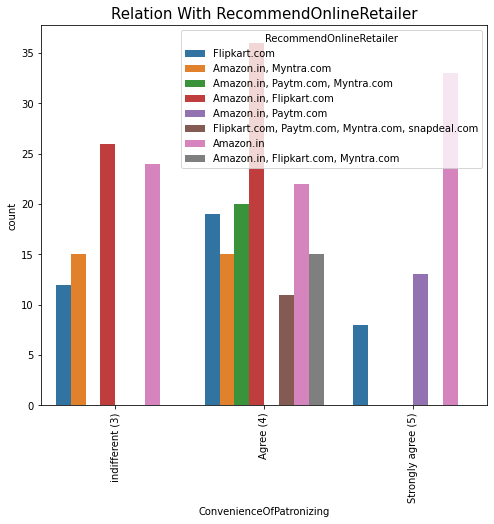

In [64]:
Recommend_Retailer('ConvenienceOfPatronizing')

Agree (4)                0.375465
indifferent (3)          0.219331
Strongly agree (5)       0.200743
Dis-agree (2)            0.185874
Strongly disagree (1)    0.018587
Name: SenseOfAdventure, dtype: float64


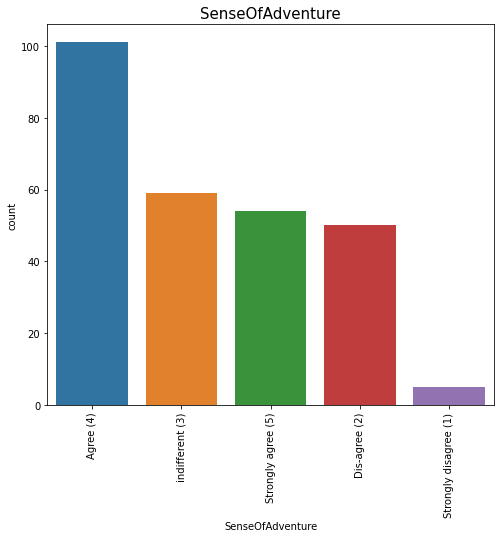

In [65]:
plot_count('SenseOfAdventure')

Agree (4)                0.375465
indifferent (3)          0.219331
Strongly agree (5)       0.200743
Dis-agree (2)            0.185874
Strongly disagree (1)    0.018587
Name: SenseOfAdventure, dtype: float64


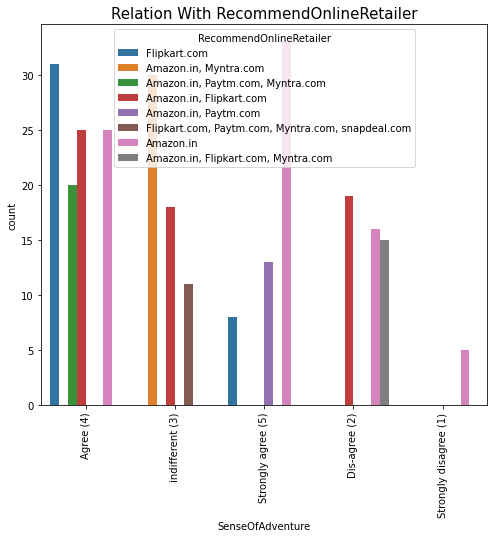

In [66]:
Recommend_Retailer('SenseOfAdventure')

indifferent (3)          0.375465
Strongly agree (5)       0.241636
Agree (4)                0.234201
Disagree (2)             0.081784
Strongly disagree (1)    0.066914
Name: FavoriteE-tailer, dtype: float64


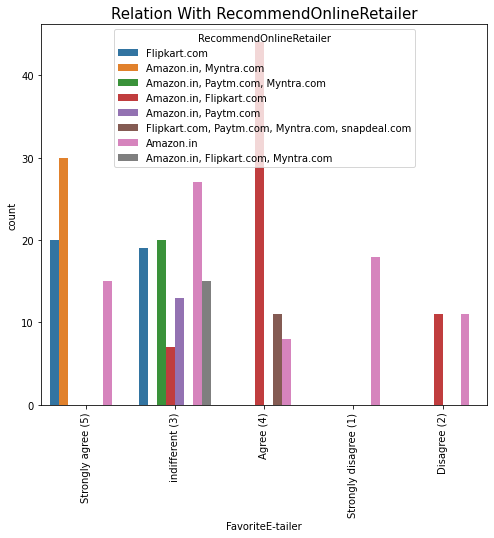

In [67]:
Recommend_Retailer('FavoriteE-tailer')

- Some customers are strongly disagreed for making amazon.in as their favourite E-Tailer.

indifferent (3)          0.327138
Agree (4)                0.327138
Strongly agree (5)       0.141264
Strongly disagree (1)    0.122677
Dis-agree (2)            0.081784
Name: FulfillRoles, dtype: float64


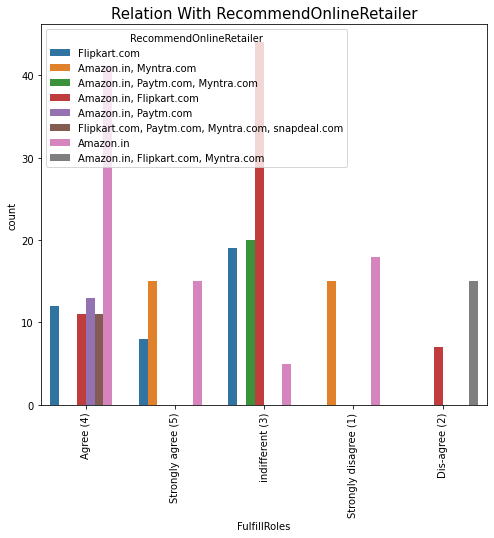

In [68]:
Recommend_Retailer('FulfillRoles')

Agree (4)             0.553903
Strongly agree (5)    0.304833
indifferent (3)       0.141264
Name: MoneySpentValue, dtype: float64


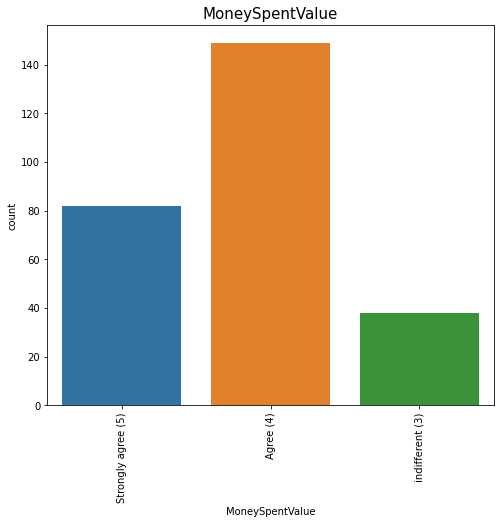

In [69]:
plot_count('MoneySpentValue')

- Most of the customers are agreed with money spent values.

In [70]:
df.head()

Gender          Age           City  Pincode YearInShoppingOnline  \
0    Male  31-40 years          Delhi   110009        Above 4 years   
1  Female  21-30 years          Delhi   110030        Above 4 years   
2  Female  21-30 years  Greater Noida   201308            3-4 years   
3    Male  21-30 years        Karnal    132001            3-4 years   
4  Female  21-30 years     Bangalore    530068            2-3 years   

     LastYearShopping InternetAccessUsing DeviceAccessUsing MobileScreenSize  \
0         31-40 times             Dial-up           Desktop           Others   
1  41 times and above               Wi-Fi        Smartphone       4.7 inches   
2  41 times and above     Mobile Internet        Smartphone       5.5 inches   
3  Less than 10 times     Mobile Internet        Smartphone       5.5 inches   
4         11-20 times               Wi-Fi        Smartphone       4.7 inches   

                DeviceOS   BrowserUsing      ChannelFollow  \
0  Window/windows Mobile  Google chrome      Search Engine   
1                IOS/Mac  Google chrome      Search Engine   
2                Android  Google chrome      Search Engine   
3                IOS/Mac         Safari      Search Engine   
4                IOS/Mac         Safari  Content Marketing   

  PlatformUsingAfterFirstVisit   PurchaseDuration  \
0                Search Engine          6-10 mins   
1              Via application  more than 15 mins   
2              Via application         11-15 mins   
3                Search Engine          6-10 mins   
4              Via application  more than 15 mins   

                          PaymentTerm AbandonFrequency  \
0  E-wallets (Paytm, Freecharge etc.)        Sometimes   
1                  Credit/Debit cards  Very frequently   
2  E-wallets (Paytm, Freecharge etc.)        Sometimes   
3                  Credit/Debit cards            Never   
4                  Credit/Debit cards       Frequently   

         ReasonBehindAbandon       ContentRating ProductComparisonRating  \
0              Lack of trust           Agree (4)         Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)      Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)               Agree (4)   
3   Better alternative offer           Agree (4)               Agree (4)   
4   Better alternative offer  Strongly agree (5)         Indifferent (3)   

    InformationRating RelevantInformationRating    NavigationRating  \
0     Indifferent (3)                 Agree (4)           Agree (4)   
1  Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2           Agree (4)                 Agree (4)           Agree (4)   
3     Indifferent (3)                 Agree (4)  Strongly agree (5)   
4     Indifferent (3)                 Agree (4)           Agree (4)   

      LoadingSpeedRating     InterfaceRating PaymentMethodRating  \
0  Strongly disagree (1)       Dis-agree (2)       Dis-agree (2)   
1     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2              Agree (4)  Strongly agree (5)  Strongly agree (5)   
3              Agree (4)  Strongly agree (5)  Strongly agree (5)   
4     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   

          TrustRating       EmpathyRating       PrivacyRating  \
0        Disagree (2)  Strongly agree (5)           Agree (4)   
1  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
3           Agree (4)  Strongly agree (5)  Strongly agree (5)   
4           Agree (4)  Strongly agree (5)           Agree (4)   

  ResponsivenessRating   Benefit&Discounts        EnjoymentRating  \
0            Agree (4)     indifferent (3)  Strongly disagree (1)   
1   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
2   Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
3            Agree (4)           Agree (4)        indifferent (3)   
4   Strongly agree (5)  S

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    0.304833
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               0.163569
Amazon.in, Flipkart.com                                         0.118959
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                0.107807
Amazon.in, Flipkart.com, Snapdeal.com                           0.100372
Amazon.in, Paytm.com, Myntra.com                                0.074349
Amazon.in                                                       0.059480
Amazon.in, Paytm.com                                            0.044610
Amazon.in, Flipkart.com, Paytm.com                              0.026022
Name: ShoppingPlatform, dtype: float64


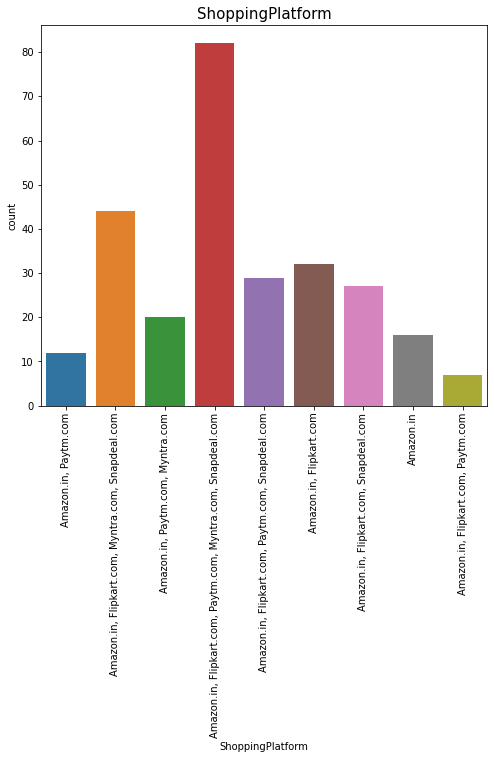

In [71]:
plot_count('ShoppingPlatform')

- Most of the  customers are use Amazon.in,Flipkart.com,paytm.com,maytra.com,snapdeal.com. together while online shopping.
- Customers are less use Amazon.in,Flipkart.com,paytm.com together for online shopping.

Amazon.in, Flipkart.com                              0.483271
Amazon.in                                            0.159851
Amazon.in, Myntra.com                                0.074349
Flipkart.com, Myntra.com                             0.055762
Myntra.com                                           0.055762
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    0.052045
Amazon.in, Flipkart.com, Paytm.com                   0.048327
Flipkart.com                                         0.044610
Paytm.com                                            0.026022
Name: VarietyOfProduct, dtype: float64


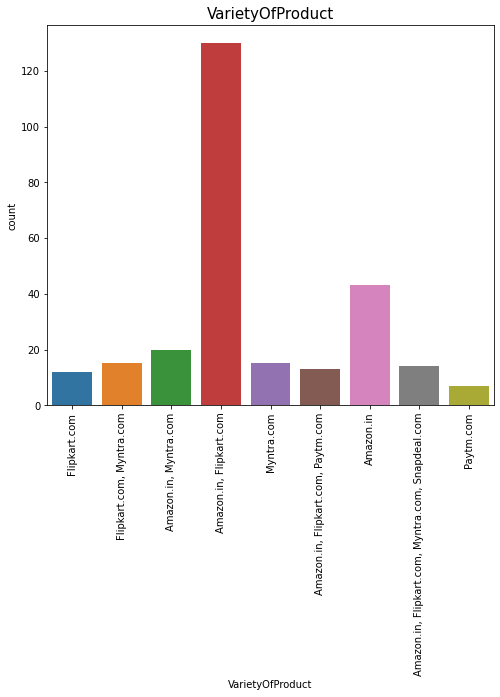

In [72]:
plot_count('VarietyOfProduct')

- Amazon.in and Flipkart has most of the variety of product.

Amazon.in, Flipkart.com                              0.483271
Amazon.in                                            0.159851
Amazon.in, Myntra.com                                0.074349
Flipkart.com, Myntra.com                             0.055762
Myntra.com                                           0.055762
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    0.052045
Amazon.in, Flipkart.com, Paytm.com                   0.048327
Flipkart.com                                         0.044610
Paytm.com                                            0.026022
Name: VarietyOfProduct, dtype: float64


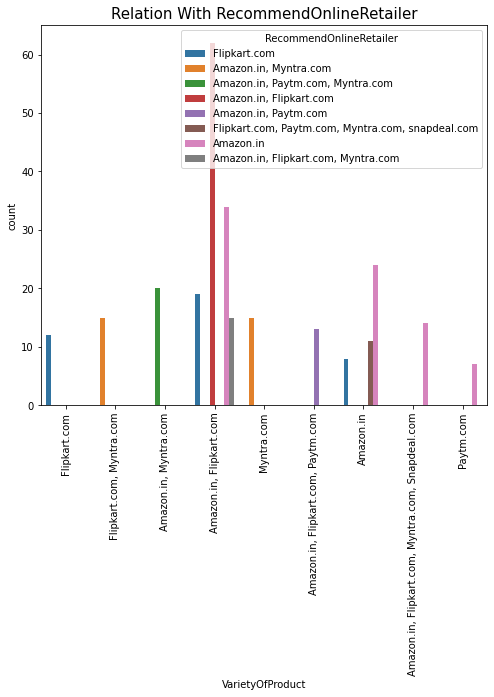

In [73]:
Recommend_Retailer('VarietyOfProduct')

Amazon.in, Flipkart.com                                         0.371747
Amazon.in                                                       0.159851
Amazon.in, Flipkart.com, Paytm.com                              0.089219
Amazon.in, Paytm.com, Myntra.com                                0.074349
Amazon.in, Flipkart.com, Myntra.com                             0.055762
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    0.055762
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               0.052045
Snapdeal.com                                                    0.044610
Flipkart.com, Snapdeal.com                                      0.040892
Flipkart.com                                                    0.029740
Amazon.in, Flipkart.com, Snapdeal.com                           0.026022
Name: DescriptionOfProduct, dtype: float64


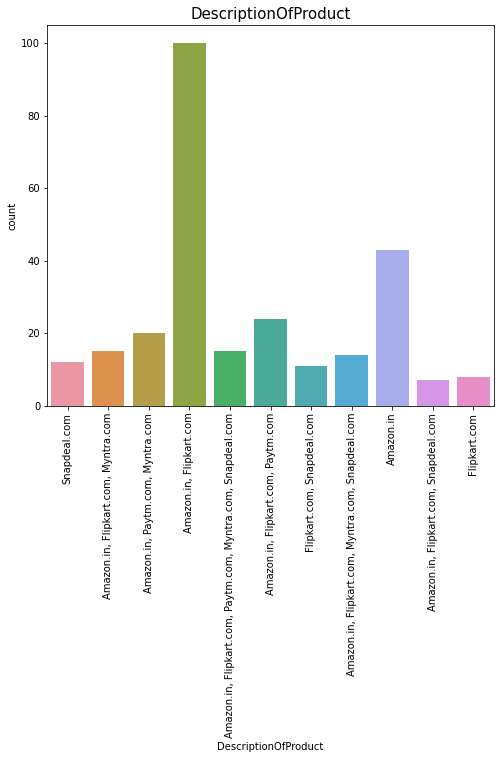

In [74]:
plot_count('DescriptionOfProduct')

- Most of the customers do like amazon and flipkart product's descriptions.

Amazon.in                                                       0.189591
Amazon.in, Paytm.com                                            0.163569
Amazon.in, Flipkart.com, Myntra.com                             0.111524
Amazon.in, Flipkart.com                                         0.111524
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    0.111524
Amazon.in, Flipkart.com, Snapdeal.com                           0.092937
Amazon.in, Flipkart.com, Paytm.com                              0.092937
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               0.052045
Snapdeal.com                                                    0.044610
Flipkart.com                                                    0.029740
Name: FastLoadingWebsite, dtype: float64


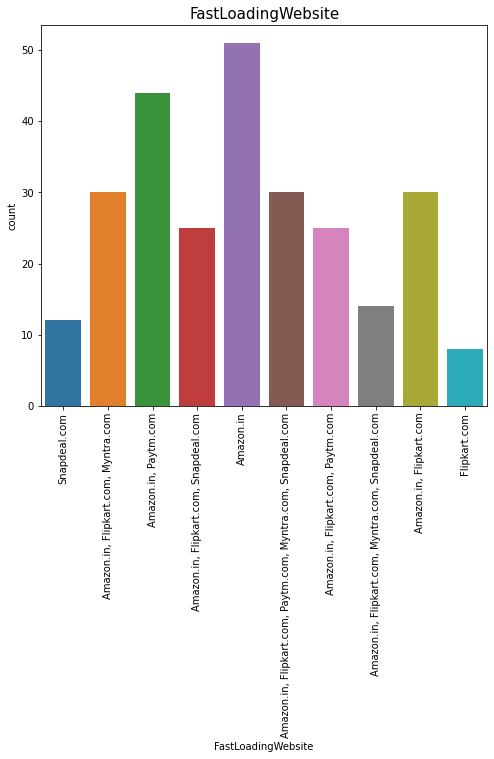

In [75]:
plot_count('FastLoadingWebsite')

- 18% cutomers are saying amazon.in loading speed is high.
- similarly 0.02% customers are saying flipkart loading speed is high.

Amazon.in                                            0.226766
Amazon.in, Flipkart.com                              0.185874
Amazon.in, Flipkart.com, Paytm.com                   0.133829
Amazon.in, Paytm.com, Myntra.com                     0.130112
Amazon.in, Flipkart.com, Snapdeal.com                0.066914
Myntra.com                                           0.055762
Flipkart.com                                         0.055762
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    0.052045
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     0.048327
Paytm.com                                            0.044610
Name: ReliabilityOfWeb, dtype: float64


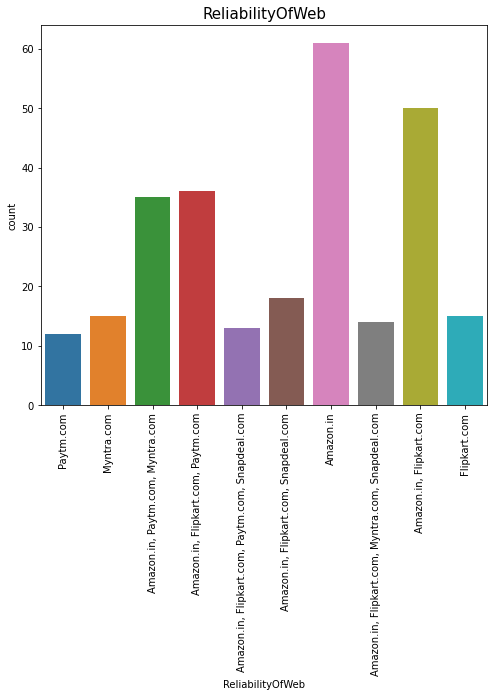

In [76]:
plot_count('ReliabilityOfWeb')

- Amazon.in is most reliable website for online shopping.

Amazon.com                                                   0.245353
Amazon.com, Flipkart.com, Paytm.com                          0.174721
Amazon.com, Flipkart.com                                     0.137546
Amazon.com, Flipkart.com, Myntra.com                         0.111524
Paytm.com                                                    0.092937
Amazon.com, Paytm.com, Myntra.com                            0.074349
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    0.055762
Flipkart.com                                                 0.055762
Flipkart.com, Myntra.com, Snapdeal                           0.052045
Name: QucknessOfPurchasing, dtype: float64


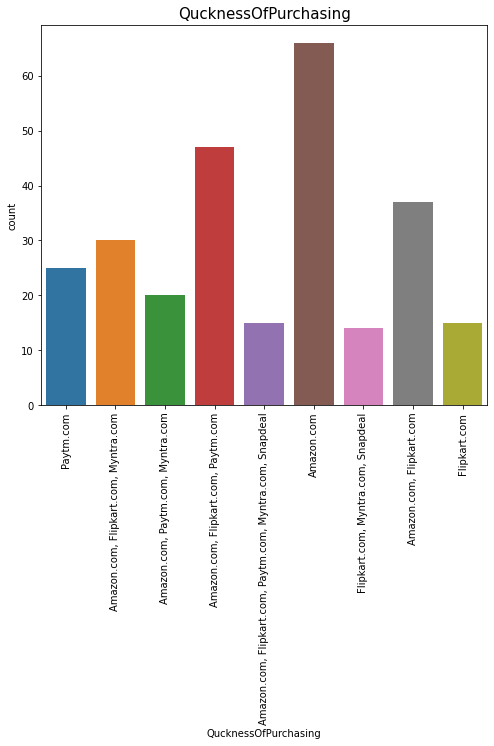

In [77]:
plot_count('QucknessOfPurchasing')

- Amazon's product are most quckly purchased by customers.

Amazon.in, Flipkart.com                                         0.241636
Amazon.in, Flipkart.com, Myntra.com                             0.148699
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    0.144981
Amazon.in                                                       0.085502
Patym.com, Myntra.com                                           0.074349
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               0.070632
Amazon.in, Flipkart.com, Snapdeal.com                           0.066914
Flipkart.com, Myntra.com, Snapdeal.com                          0.052045
Patym.com                                                       0.044610
Amazon.in, Patym.com                                            0.040892
Flipkart.com                                                    0.029740
Name: PaymentOptionAvailability, dtype: float64


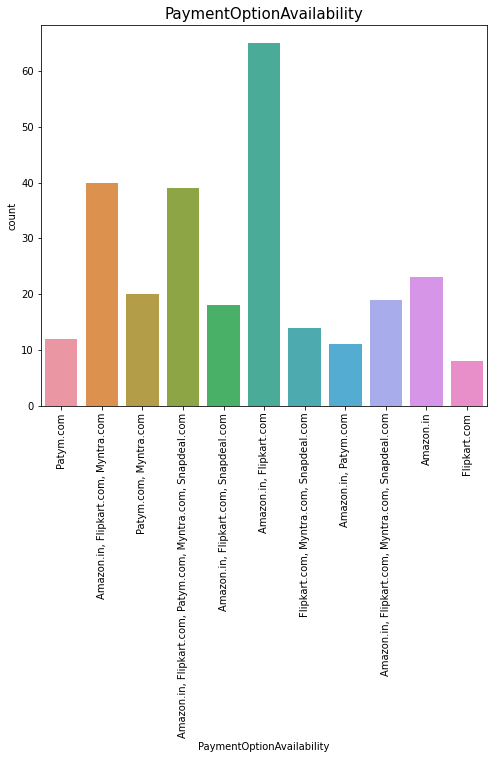

In [78]:
plot_count('PaymentOptionAvailability')

- Amazon and flipkart online shopping websites have most online and offline payment options available.

Amazon.in                                 0.397770
Amazon.in, Flipkart.com                   0.304833
Amazon.in, Flipkart.com, Snapdeal.com     0.133829
Amazon.in, Flipkart.com, Myntra.com       0.055762
Flipkart.com                              0.055762
Flipkart.com, Myntra.com, Snapdeal.com    0.052045
Name: DeliverySpeed, dtype: float64


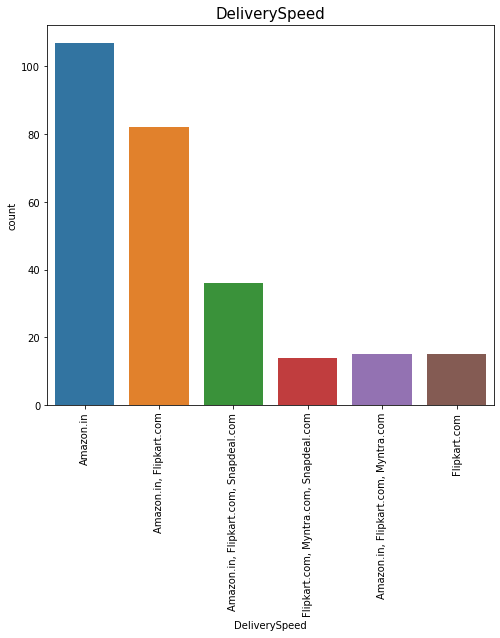

In [79]:
plot_count('DeliverySpeed')

- Amazon and flipkart have high delivery speed of the  product.

Amazon.in                                                       0.263941
Amazon.in, Flipkart.com                                         0.200743
Amazon.in, Flipkart.com, Myntra.com                             0.092937
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    0.089219
Paytm.com                                                       0.066914
Myntra.com                                                      0.055762
Amazon.in, Paytm.com                                            0.055762
Flipkart.com                                                    0.055762
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               0.052045
Amazon.in, Flipkart.com, Paytm.com                              0.040892
Amazon.in, Flipkart.com, Snapdeal.com                           0.026022
Name: CustomerPrivacy, dtype: float64


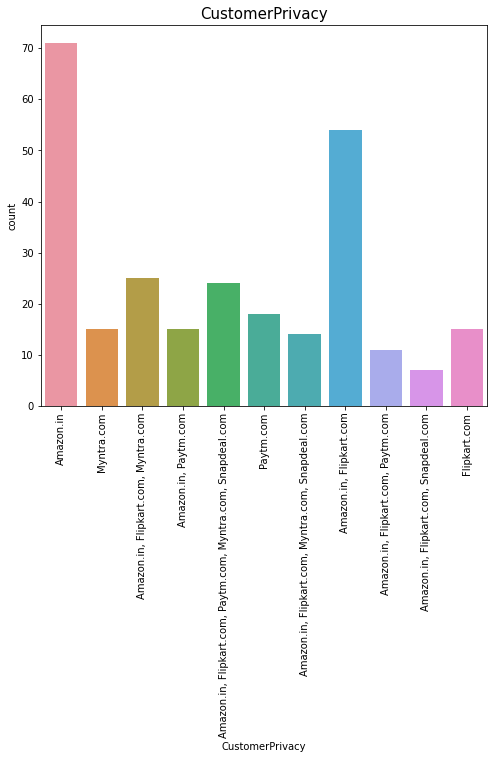

In [80]:
plot_count('CustomerPrivacy')

- Amazon and flipkart are  most trustable website when we talk about customers privacy.

Amazon.in                                                       0.189591
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    0.156134
Flipkart.com                                                    0.122677
Amazon.in, Flipkart.com, Snapdeal.com                           0.092937
Amazon.in, Flipkart.com                                         0.089219
Amazon.in, Paytm.com, Myntra.com                                0.074349
Amazon.in, Snapdeal.com                                         0.070632
Myntra.com                                                      0.055762
Paytm.com                                                       0.055762
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               0.052045
Amazon.in, Flipkart.com, Paytm.com                              0.040892
Name: SecurityOfInformation, dtype: float64


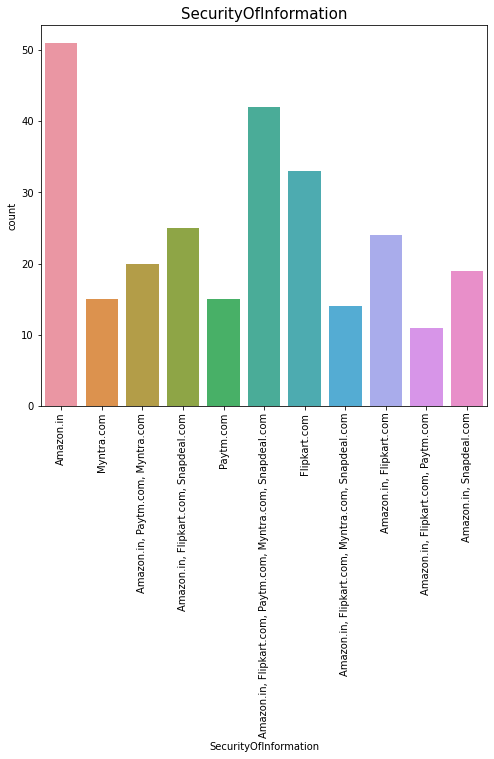

In [81]:
plot_count('SecurityOfInformation')

Amazon.in                                                       0.282528
Amazon.in, Flipkart.com, Snapdeal.com                           0.133829
Amazon.in, Myntra.com                                           0.130112
Amazon.in, Flipkart.com                                         0.115242
Flipkart.com                                                    0.100372
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               0.092937
Myntra.com                                                      0.055762
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    0.048327
Amazon.in, Flipkart.com, Paytm.com                              0.040892
Name: PerceivedTrustworthiness, dtype: float64


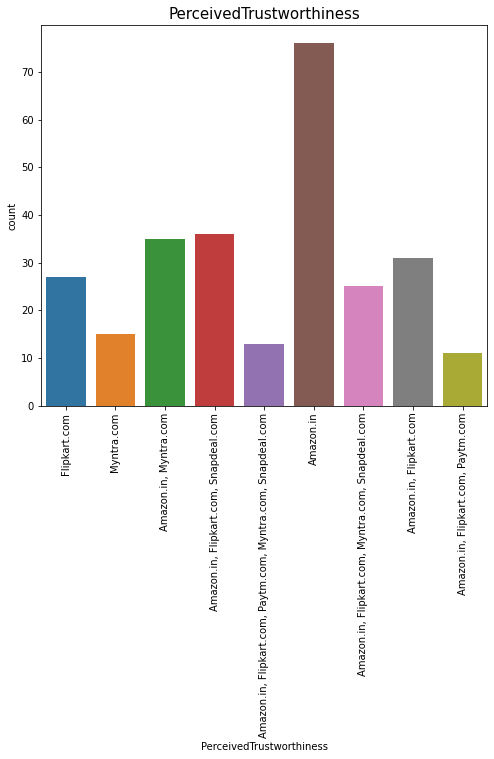

In [82]:
plot_count('PerceivedTrustworthiness')

Myntra.com                          0.226766
Paytm.com                           0.219331
Flipkart.com                        0.118959
Snapdeal.com                        0.085502
Amazon.in, Flipkart.com             0.066914
Amazon.in                           0.059480
Paytm.com, Snapdeal.com             0.055762
Amazon.in, Snapdeal.com             0.052045
Amazon.in, Paytm.com                0.048327
Flipkart.com, Snapdeal.com          0.040892
Amazon.in, Paytm.com, Myntra.com    0.026022
Name: LongerPageLoadingTime, dtype: float64


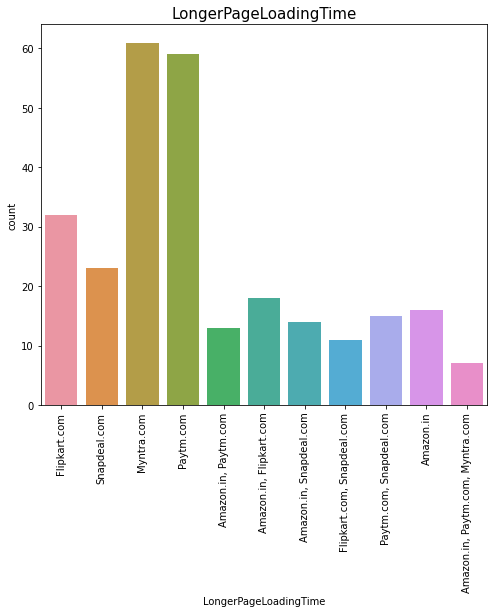

In [83]:
plot_count('LongerPageLoadingTime')

- Mytra.com and paytm.com both the online shopping web site take highest time for page loading.

Snapdeal.com                0.323420
Amazon.in                   0.230483
Flipkart.com                0.115242
Amazon.in, Flipkart.com     0.107807
Paytm.com                   0.092937
Paytm.com, Snapdeal.com     0.055762
Amazon.in, Paytm.com        0.048327
Myntra.com, Snapdeal.com    0.026022
Name: LimitedPaymentMethod, dtype: float64


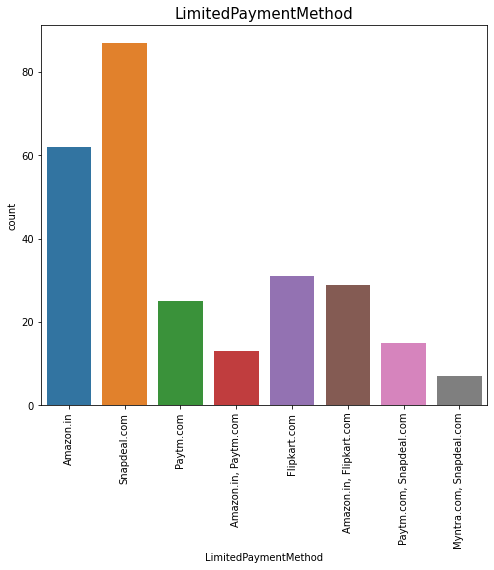

In [84]:
plot_count('LimitedPaymentMethod')

- Snapdeal.com web site has limited payment methods available for online shopping.

Paytm.com                  0.267658
Snapdeal.com               0.237918
Flipkart.com               0.163569
Amazon.in                  0.137546
Myntra.com                 0.096654
Paytm.com, Snapdeal.com    0.096654
Name: LongerDeliveryPeriod, dtype: float64


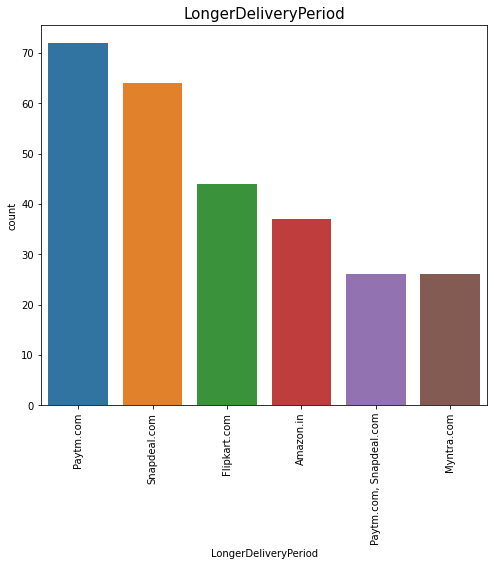

In [85]:
plot_count('LongerDeliveryPeriod')

- Paytm.com and Snapdeal.com take highest time for delivery of the product.

Amazon.in                             0.349442
Flipkart.com                          0.174721
Amazon.in, Flipkart.com               0.167286
Amazon.in, Flipkart.com, Paytm.com    0.092937
Amazon.in, Paytm.com                  0.066914
Paytm.com                             0.055762
Myntra.com, Snapdeal.com              0.052045
Snapdeal.com                          0.040892
Name: EfficienceOfWebsite, dtype: float64


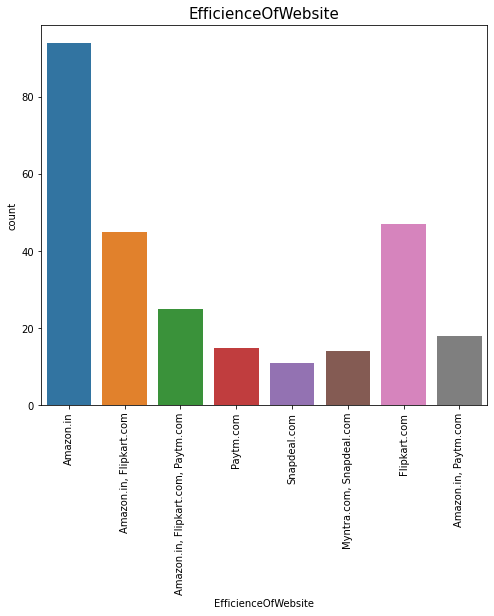

In [86]:
plot_count('EfficienceOfWebsite')

- Amazon and Flipkart have highest efficiency as compare to other websites.

## Encoding:

In [87]:
from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    df[i]=LabelEncoder().fit_transform(df[i].values.reshape(-1,1))

In [88]:
df

Gender  Age  City  Pincode  YearInShoppingOnline  LastYearShopping  \
0         1    1     2        1                     3                 2   
1         0    0     2        5                     3                 3   
2         0    0     4       23                     2                 3   
3         1    0     6       11                     2                 5   
4         0    0     0       31                     1                 0   
..      ...  ...   ...      ...                   ...               ...   
264       0    0    10       13                     0                 5   
265       0    1     3       17                     0                 2   
266       0    2     0       35                     1                 5   
267       0    4    10       14                     1                 5   
268       0    2     3       18                     1                 2   

     InternetAccessUsing  DeviceAccessUsing  MobileScreenSize  DeviceOS  \
0                      0                  0                 3         2   
1                      3                  2                 0         1   
2                      1                  2                 2         0   
3                      1                  2                 2         1   
4                      3                  2                 0         1   
..                   ...                ...               ...       ...   
264                    1                  2                 2         0   
265                    1                  2                 3         0   
266                    2                  1                 3         2   
267                    3                  2                 2         0   
268                    1                  2                 2         0   

     BrowserUsing  ChannelFollow  PlatformUsingAfterFirstVisit  \
0               0              2                             2   
1               0              2                             4   
2               0              2                             4   
3               3              2                             2   
4               3              0                             4   
..            ...            ...                           ...   
264             2              1                             3   
265             0              2                             4   
266             0              2                             2   
267             0              2                             0   
268             0              2                             4   

     PurchaseDuration  PaymentTerm  AbandonFrequency  ReasonBehindAbandon  \
0                   2            2                 2                    2   
1                   4            1                 3                    4   
2                   1            2                 2                    4   
3                   2            1                 1                    0   
4                   4            1                 0                    0   
..                ...          ...               ...                  ...   
264                 4            0                 1                    0   
265                 3            0                 2                    1   
266                 4            1                 2                    0   
267                 0            0                 2                    3   
268                 1            0                 1                    4   

     ContentRating  ProductComparisonRating  InformationRating  \
0                0                        2                  2   
1                2                        3                  3   
2                2                        0                  0   
3                0                        0                  2   
4                2                        2                  2   
..             ...                      ...                ...   
264              0     

## Plotting Heatmap:

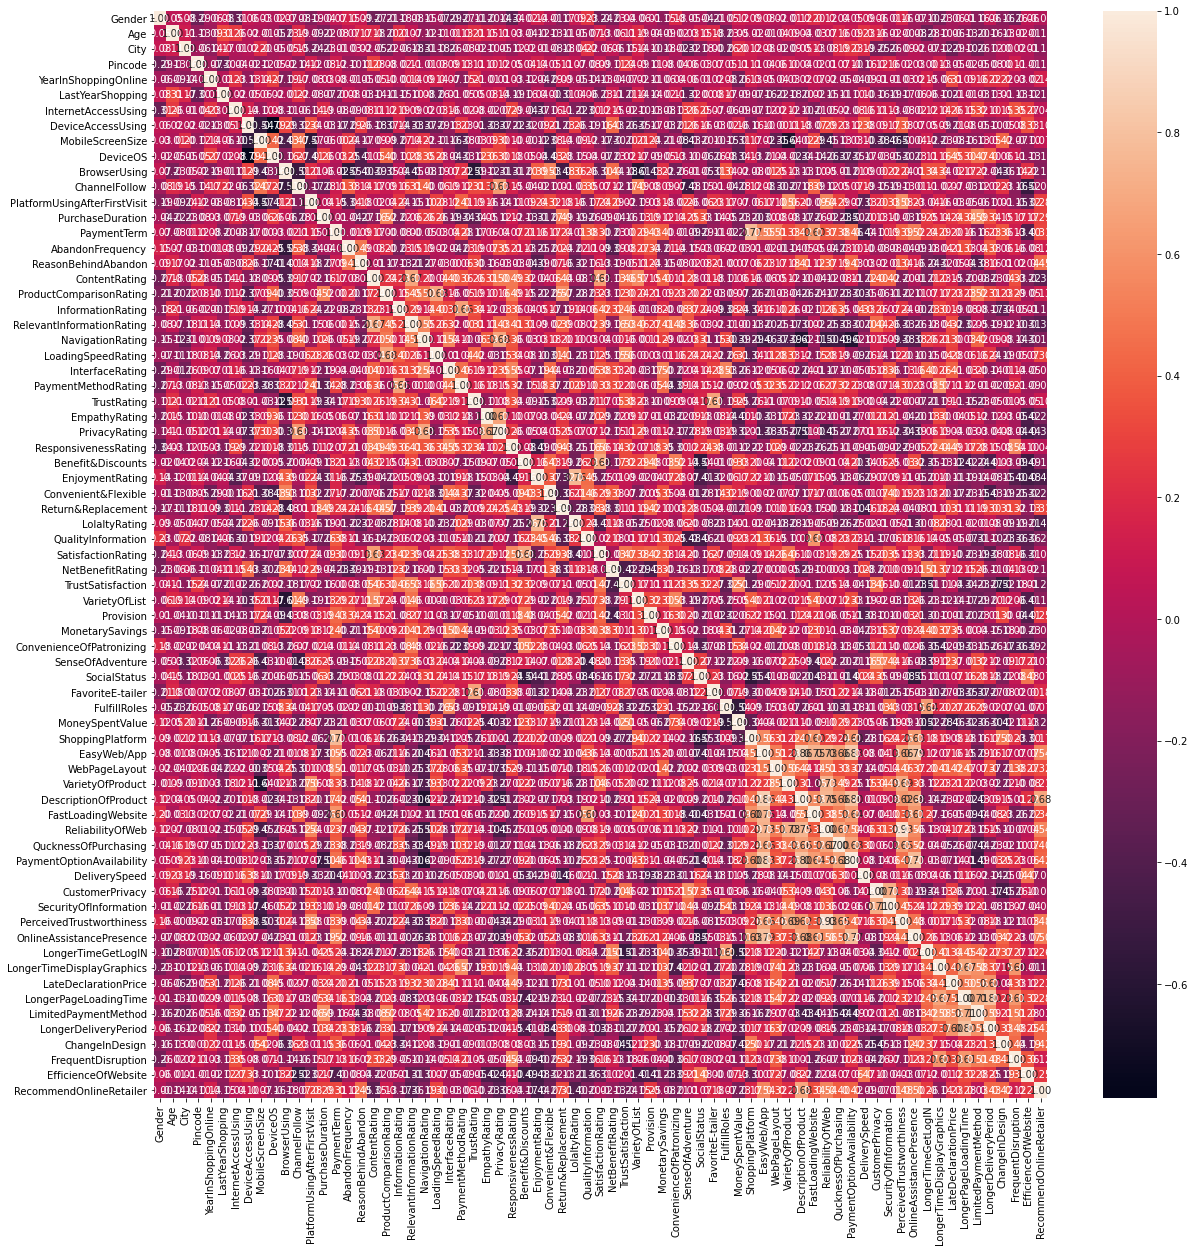

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='b')
plt.show()

### Observation of the Heatmap:
- We have good number of columns present that's why it is difficult to understand heatmap here.
- But we can see that in the last columns are strongly correlated with eachother.

## Correlation With Target:

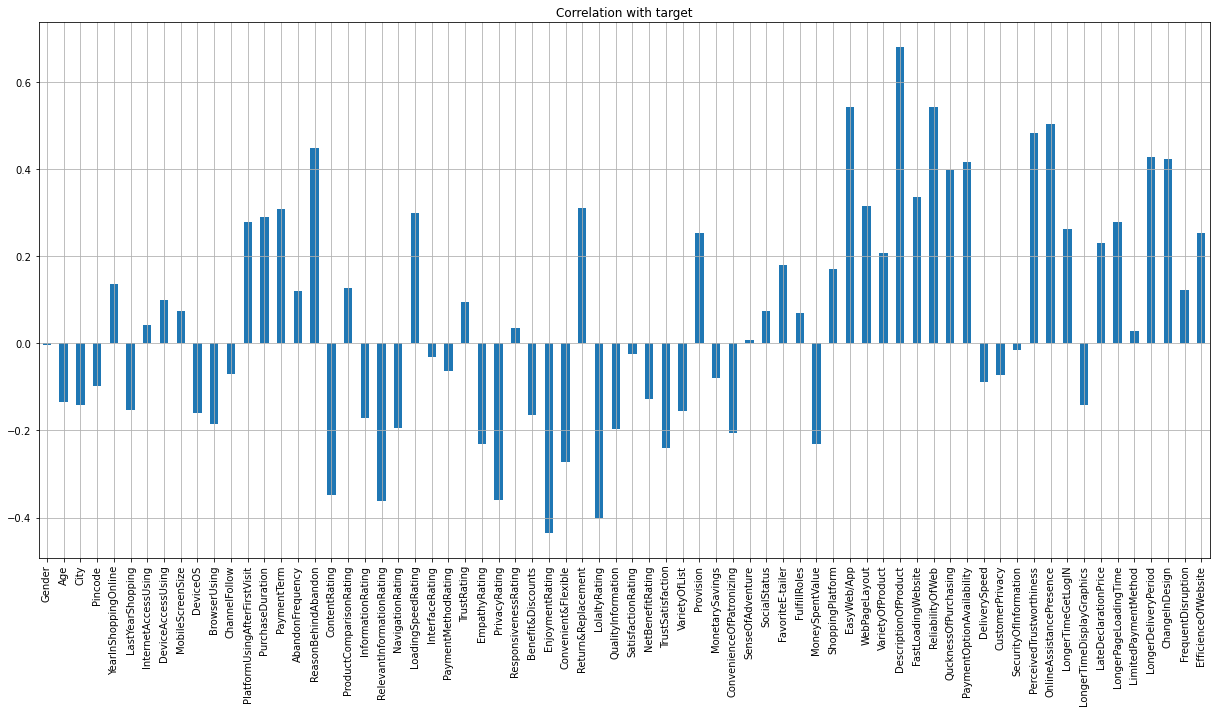

In [90]:
df.drop('RecommendOnlineRetailer',axis=1).corrwith(df.RecommendOnlineRetailer).plot(kind='bar',grid=True,figsize=(17,10),
                                                                                    title='Correlation with target')
plt.tight_layout()

### Observations:
- 'InterfaceRating','SatisfactionRating','SecurityOfInformation' features are very less negatively correlated with target variable.
- 'ResponsivenessRating','SenseOfAdventure','LimitedPaymentMethod' are very less Positively correalted with target variable.
- 'ReasonBehineAdventure','EasyWebApp','DescriptionOfProduct','realiabilityOfWeb','PerceivedTrustworthness','OnlineAssistancePresense' features are highest correalted with target varieble.
- 'ContentRating','RelevantInformationRating','PrivacyRating','LoyalityRaing' are storngly negatively correalted with target variable.

## Dropping Less correlated variable:
Usually we delete those columns which are less or not related with the  target variable. It will affect less or very less  with  our target variable but we are not delete those columns than our model take more time to train and cost is also associate with it. So it is good to drop unwanted feature.

PinCode feature is a kinnd of nomial data type. It is only for name shake, it will not help to predict target variable so we will also drop it.

In [91]:
df.Pincode.value_counts()

23    38
11    19
24    18
8     16
30     9
14     9
13     9
38     8
12     8
35     8
10     8
22     7
0      7
2      7
3      6
4      6
29     5
17     5
18     5
21     5
31     5
25     5
9      4
37     4
34     4
33     4
19     4
7      4
5      4
6      4
20     4
1      4
16     4
15     4
36     3
26     2
27     1
28     1
32     1
Name: Pincode, dtype: int64

In [93]:
df.drop(columns=['Pincode','InterfaceRating','SatisfactionRating','SecurityOfInformation',
                 'ResponsivenessRating','SenseOfAdventure','LimitedPaymentMethod'],inplace=True)

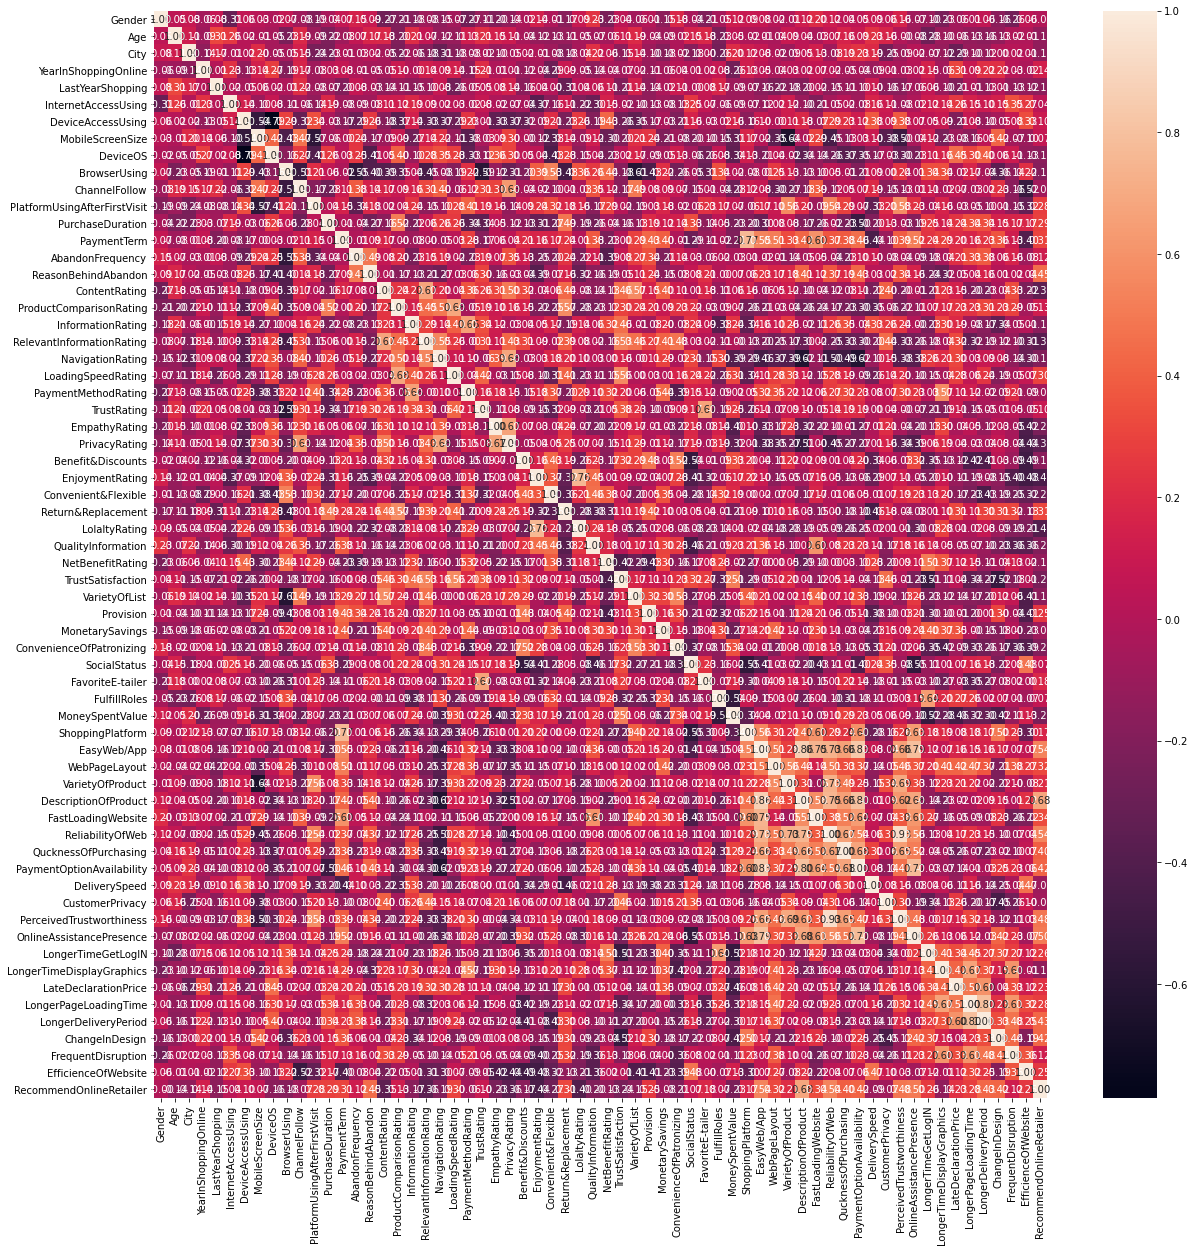

In [94]:
## plotting heatmap again:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='b')
plt.show()

## Plotting the Target Varibale:


0    0.293680
1    0.230483
6    0.144981
3    0.111524
5    0.074349
2    0.055762
4    0.048327
7    0.040892
Name: RecommendOnlineRetailer, dtype: float64


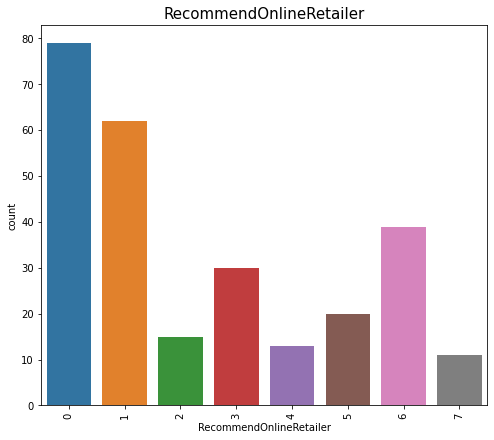

In [95]:
plot_count('RecommendOnlineRetailer')

### Observations:
- Most of the customers are recommend Amazon.in to his other friend for online shopping.
- Flipkart is second highest recommend website for online shopping.
- paytm.com and snapdeal are very less recommend website for online shopping by customers.

### Checking outliers:

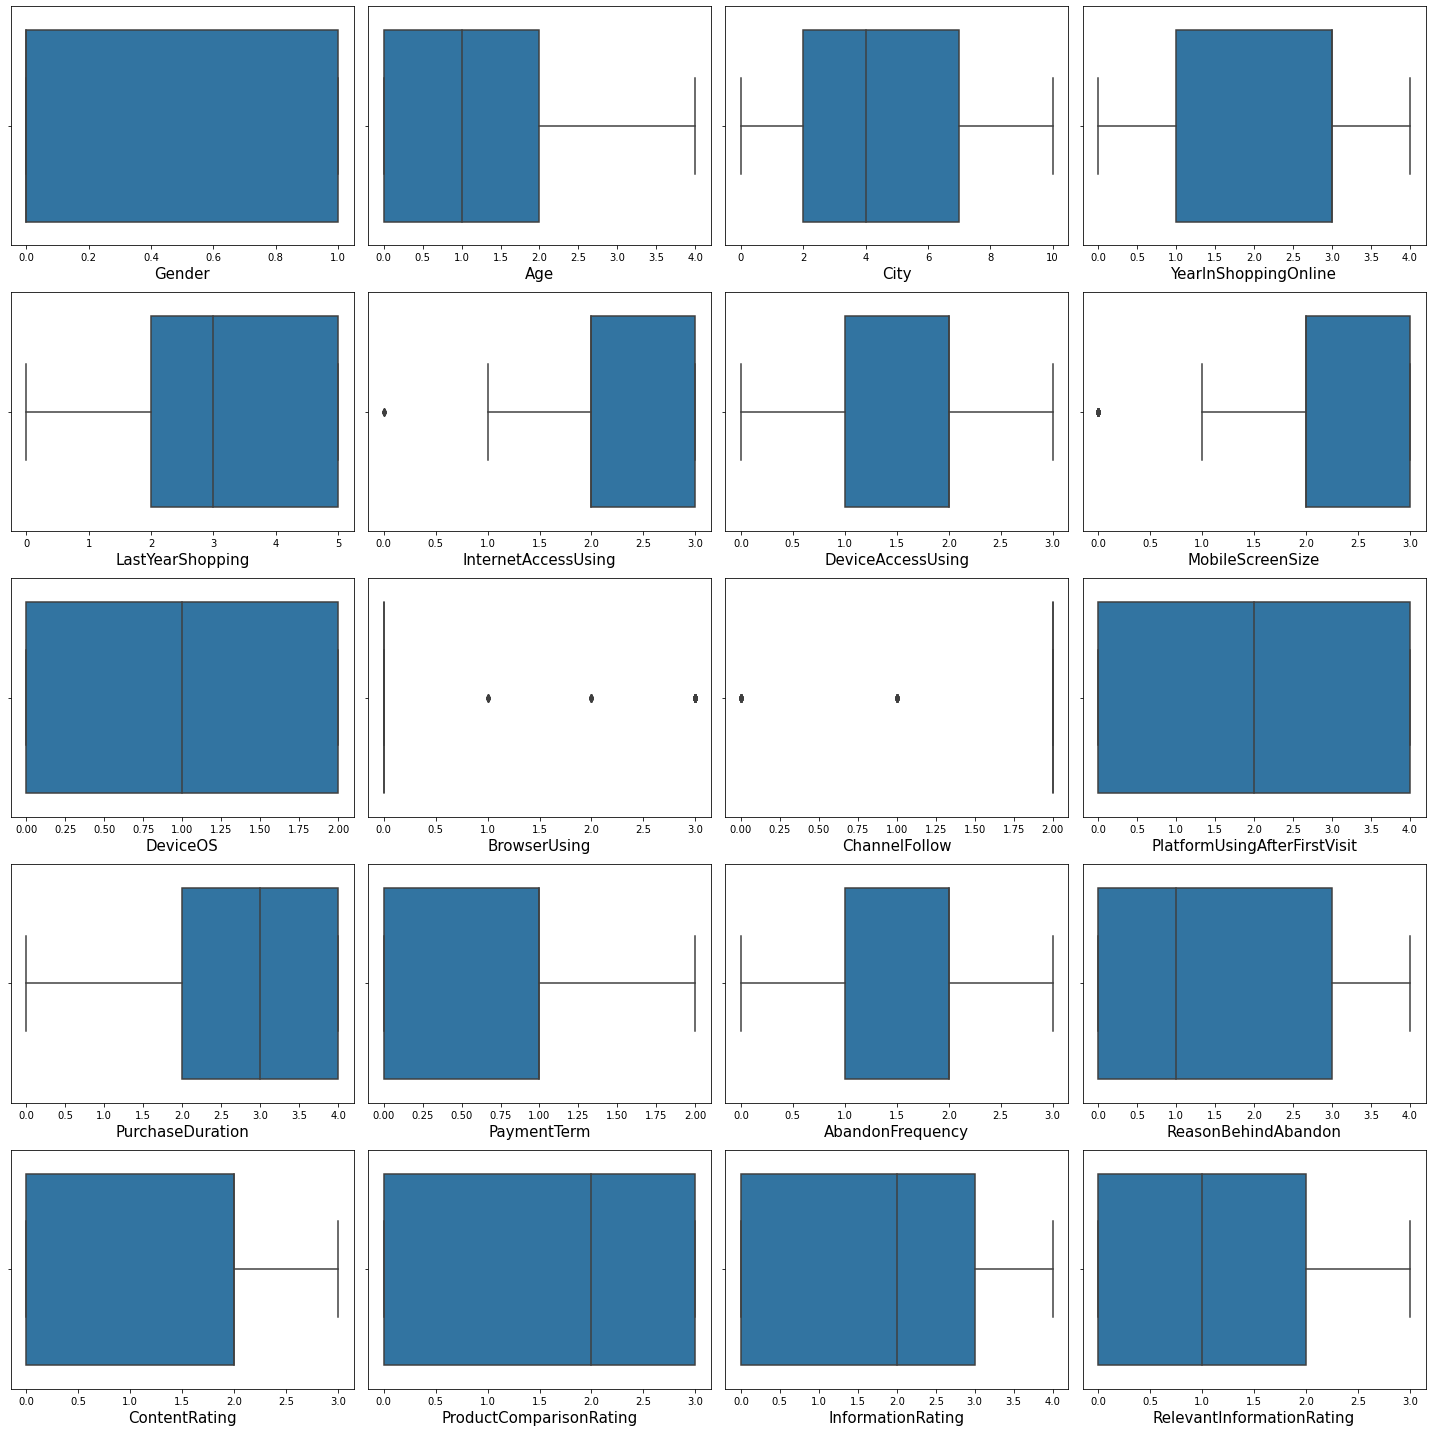

In [96]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df.columns[:20]:
    if plotnumber<100:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

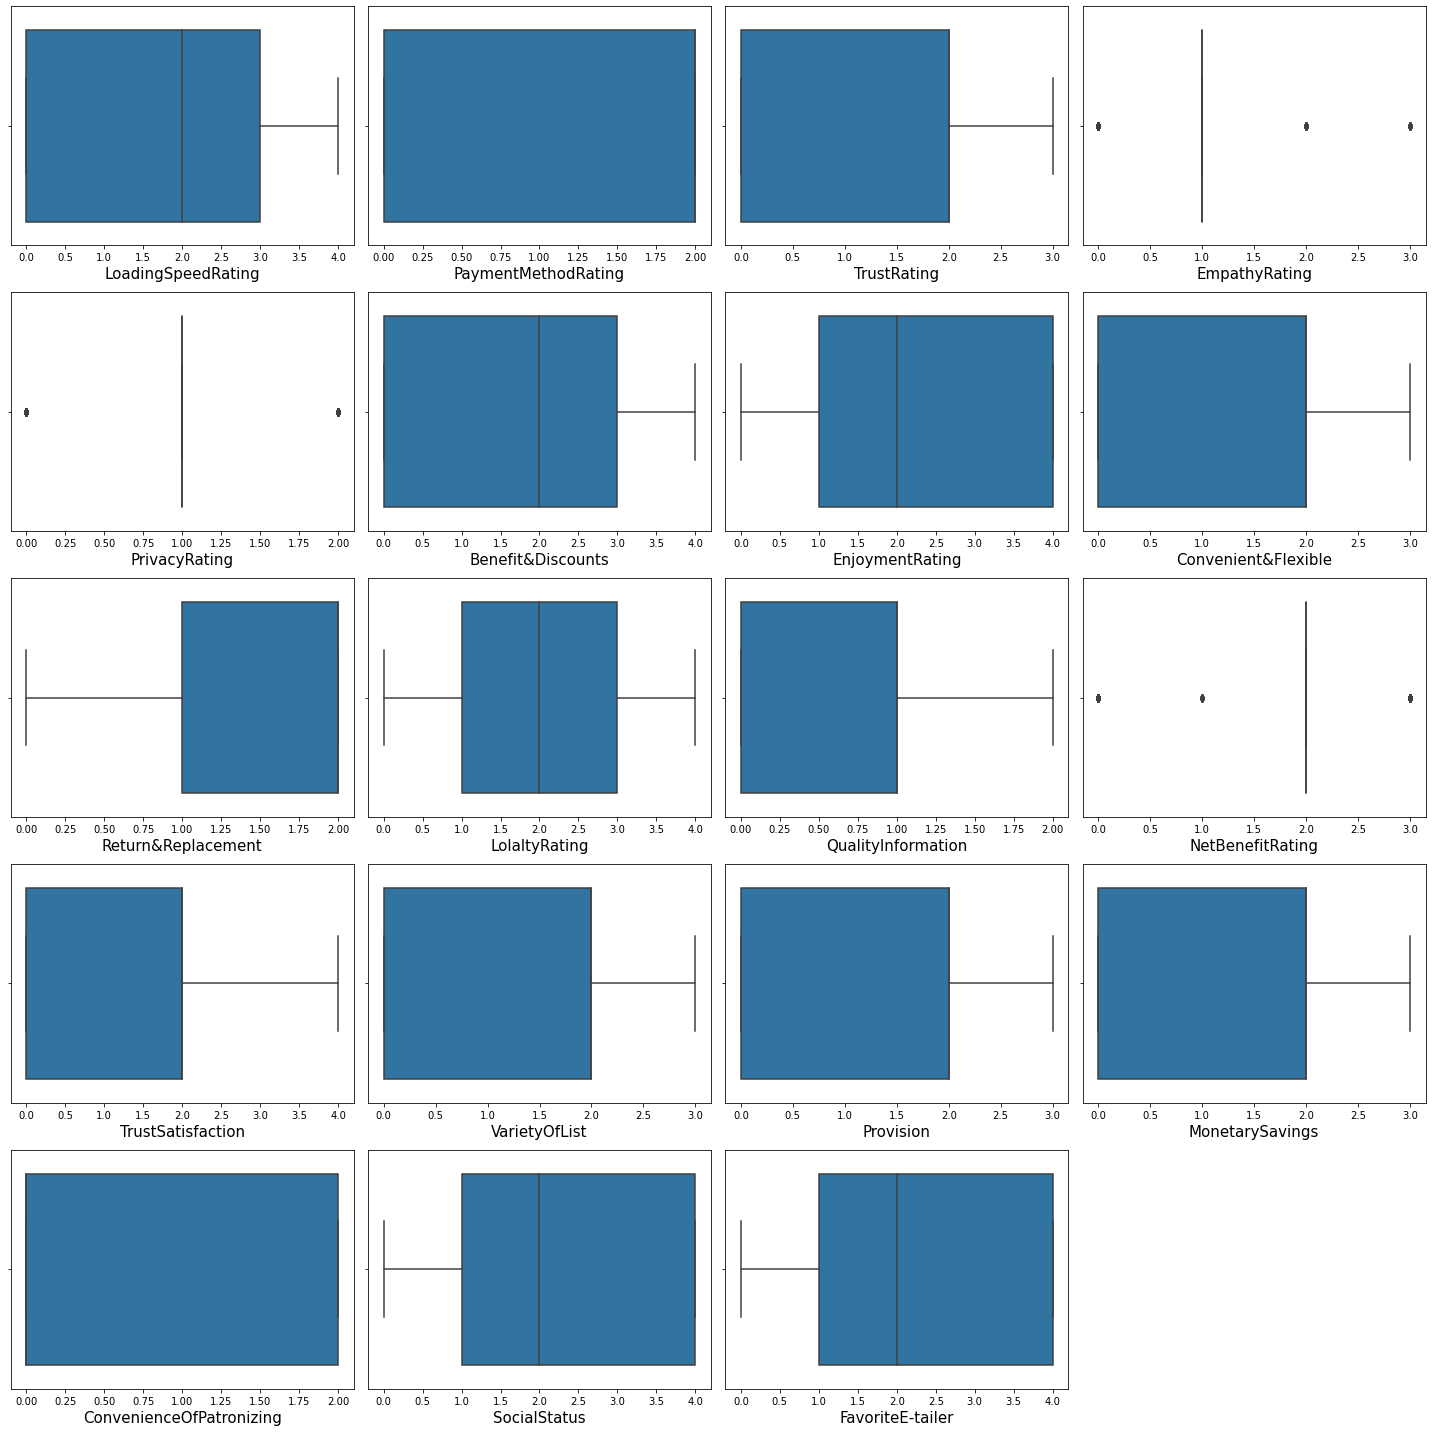

In [97]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df.columns[21:40]:
    if plotnumber<100:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

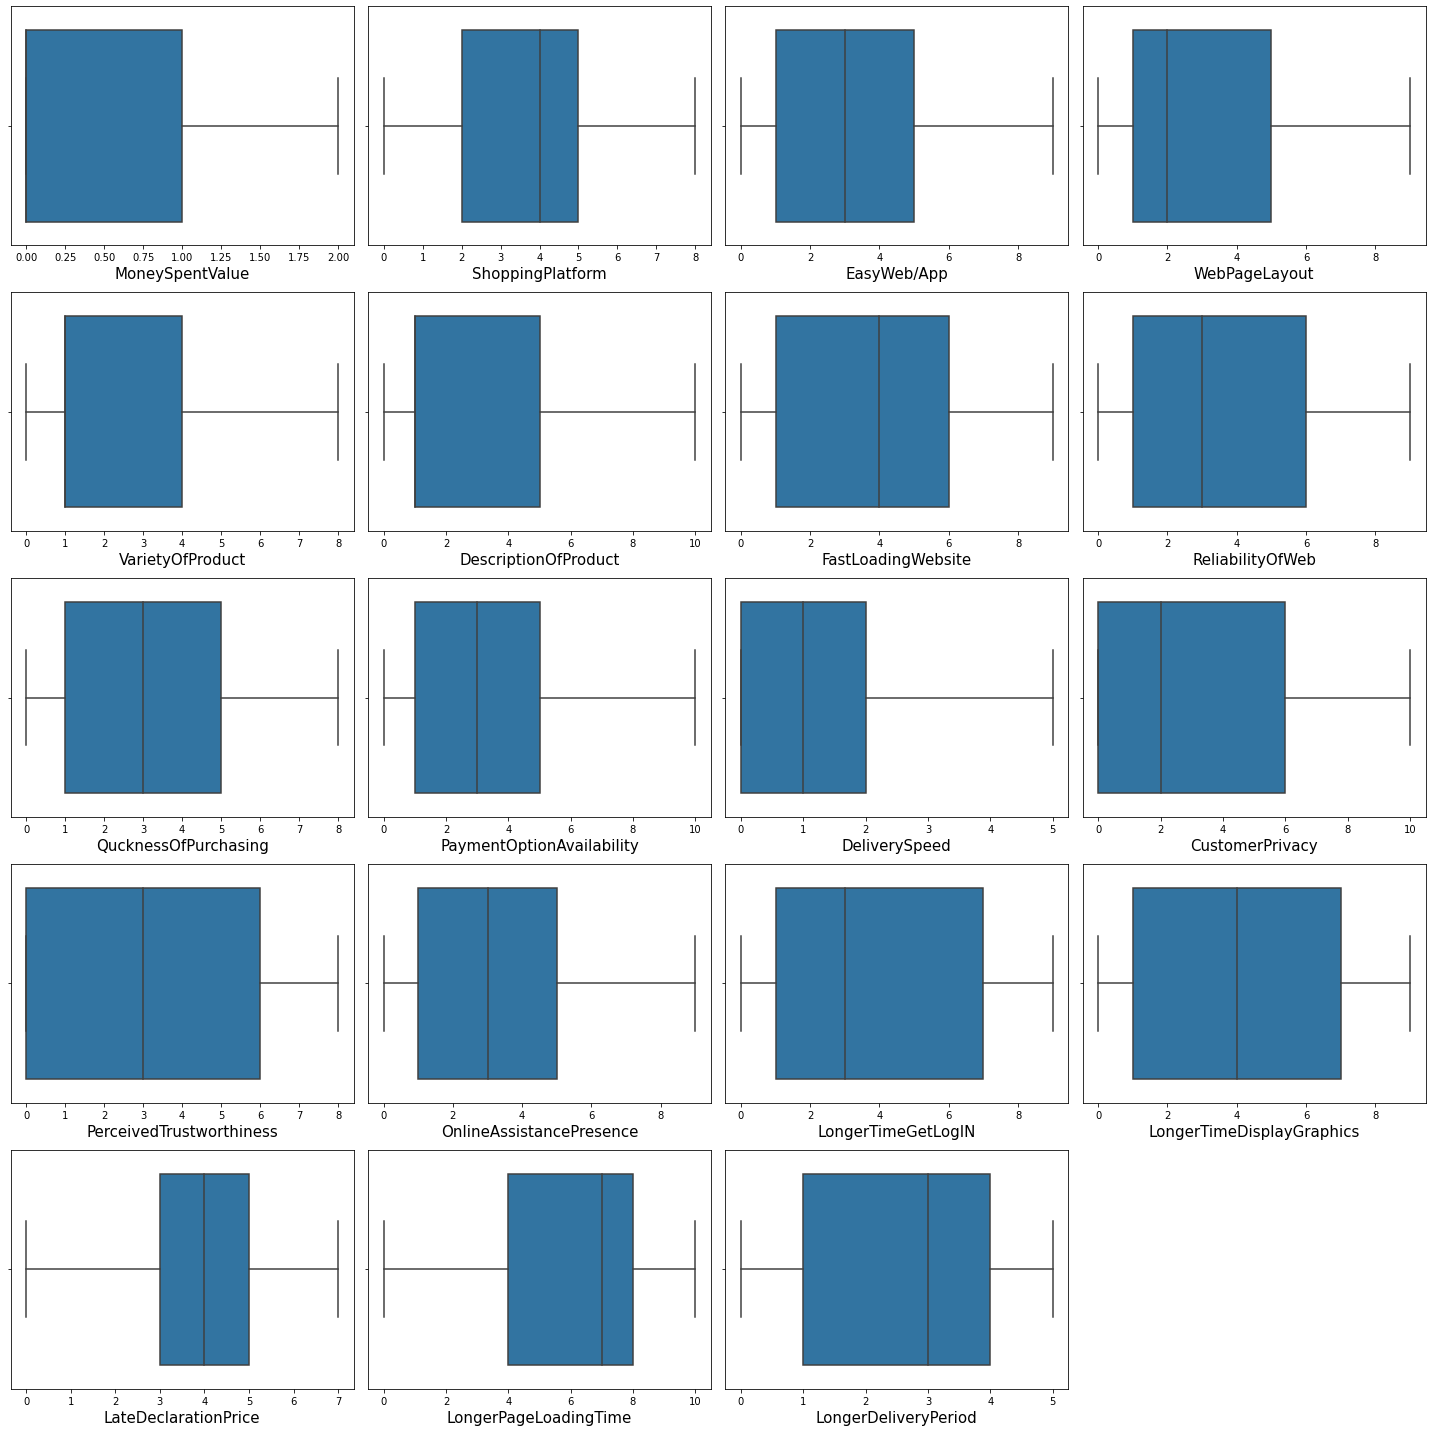

In [98]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df.columns[41:60]:
    if plotnumber<100:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

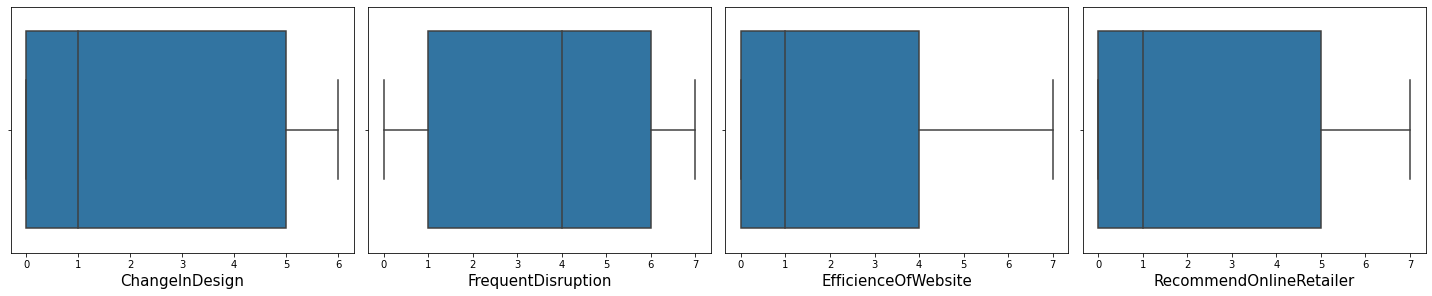

In [99]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df.columns[60:]:
    if plotnumber<100:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#### As we can see that all the features are categorical data type so we can not remove outliers from those features.